# Lending Club Case Study

**Problem Statement**

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The aim is to identify patterns which indicate if a person is likely to default, 
how consumer attributes and loan attributes influence the tendency of default which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.





In [568]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
import plotly.express as px
warnings.filterwarnings('ignore') #Filter Warning Messages
pd.set_option('display.max_columns',120) ## Set display limit for the columns 
pd.set_option('display.max_info_columns',120)# set display limit for Info columns

## Data Sourcing

In [569]:
# Step1: Importing the Loan.csv Dataset
loan_raw=pd.read_csv('Data/loan.csv', low_memory=False)

In [570]:
# Step2: Checking the Shape of Loan.csv
loan_raw.shape

(39717, 111)

In [571]:
# Step3: Checking Sample data of loan.csv
loan_raw.head(2) 

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         3        0   
1                     NaN                     NaN         3        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f        0.0   
1       1687      9.40%          4                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5863.155187          5833.84          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             May-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0               0           NaN          NaN          NaN         NaN   
1               0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          NaN           NaN                   NaN          NaN   
1          NaN           NaN                   NaN          NaN   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0             NaN      NaN                       0.0            0   
1             NaN      NaN                       0.0            0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0 

In [572]:
# Step4: Checking the count of toal numerical and categorical columns in loan.csv

print('Total number of numeric Columns: {}'.format( len([col for col in loan_raw if loan_raw[col].dtype!='object'])))
print('Total number of categorical Columns: {}'.format( len([col for col in loan_raw if loan_raw[col].dtype=='object'])))


Total number of numeric Columns: 87
Total number of categorical Columns: 24


In [573]:
# Step 5: Checking Non-null information about  Loan.csv
loan_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Handling and Cleaning

Here we will do following:

- Fix rows and columns
- Fix missing values
- Standardise values
- Fix invalid values
- Filter data

#### Removing Duplicate Rows

In [574]:
loan_raw_nodup=loan_raw.drop_duplicates()
loan_raw_nodup.shape

(39717, 111)

In [575]:
if loan_raw.shape[0] == loan_raw_nodup.shape[0]:
    print('No row level Duplicate Records Observed')
else :
    print('{} Duplicate Records were removed'.format(int(loan_raw.shape[0])-int(loan_raw_nodup.shape[0])))

No row level Duplicate Records Observed


#### Null/Missing Value Analysis

In [576]:
nulls=pd.DataFrame([[ col for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() !=0],
      [ round((loan_raw_nodup[col].isnull().sum())*100/len(loan_raw_nodup)) for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() !=0]]).transpose()



In [577]:
nulls.columns=['column','freq']
nulls.transpose()

0           1     2      3                       4   \
column  emp_title  emp_length  desc  title  mths_since_last_delinq   
freq            6           3    33      0                      65   

                            5           6             7             8   \
column  mths_since_last_record  revol_util  last_pymnt_d  next_pymnt_d   
freq                        93           0             0            97   

                        9                           10  \
column  last_credit_pull_d  collections_12_mths_ex_med   
freq                     0                           0   

                                 11                12         13  \
column  mths_since_last_major_derog  annual_inc_joint  dti_joint   
freq                            100               100        100   

                               14            15           16           17  \
column  verification_status_joint  tot_coll_amt  tot_cur_bal  open_acc_6m   
freq                          100           100          100          100   

                18           19           20                  21  \
column  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il   
freq           100          100          100                 100   

                  22       23           24           25          26        27  \
column  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util   
freq             100      100          100          100         100       100   

                      28      29           30            31  \
column  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m   
freq                 100     100          100           100   

                          32           33              34       35  \
column  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util   
freq                     100          100             100      100   

                              36                  37                    38  \
column  chargeoff_within_12_mths  mo_sin_old_il_acct  mo_sin_old_rev_tl_op   
freq                           0                 100                   100   

                           39              40        41                    42  \
column  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc   
freq                      100             100       100                   100   

                              43                     44  \
column  mths_since_recent_bc_dlq  mths_since_recent_inq   
freq                         100                    100   

                                    45                     46              47  \
column  mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl   
freq                               100                    100             100   

                     48           49         50         51             52  \
column  num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl   
freq                100          100        100        100            100   

                   53                   54        55                56  \
column  num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m   
freq              100                  100       100               100   

                  57                  58                  59              60  \
column  num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq   
freq             100                 100                 100             100   

                      61                    62         63               64  \
column  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim   
freq                 100                     2          0              100   

                       65              66                          67  
column  total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
freq                  100             100                         100

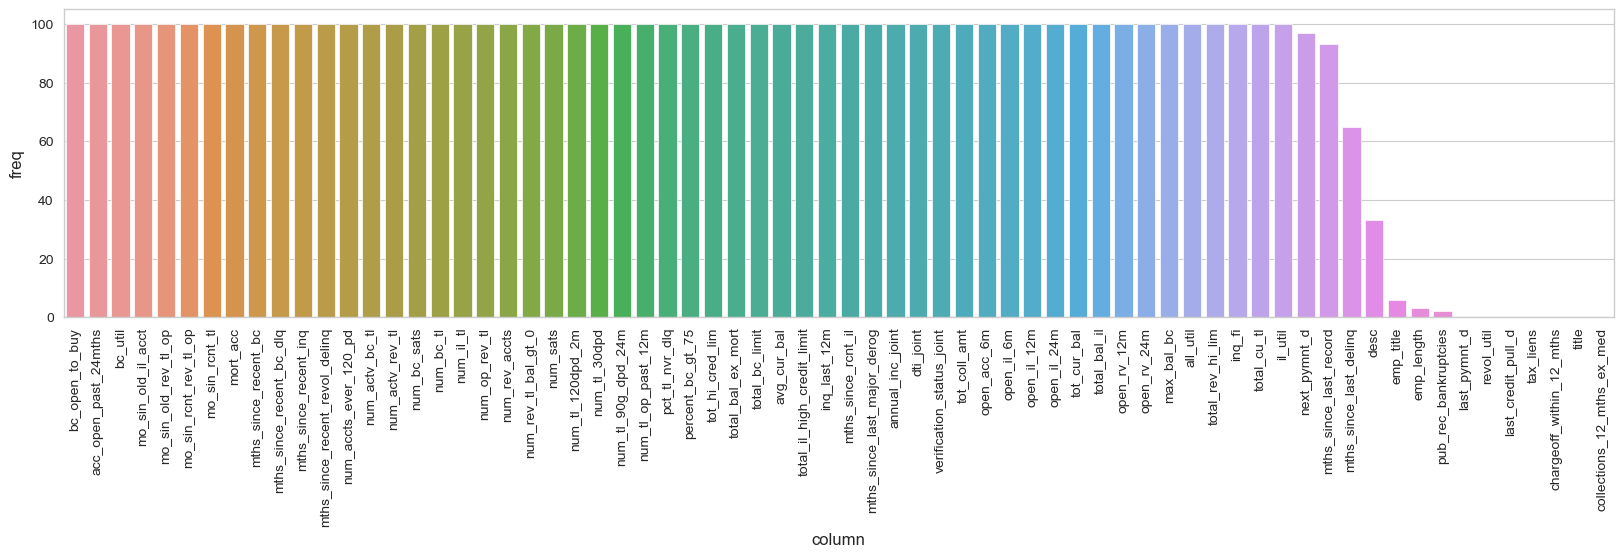

In [578]:
nulls.sort_values(by='freq',ascending=False,inplace=True)
nulls
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(data=nulls,x='column',y='freq', ax=ax)
plt.xticks(rotation=90)
plt.show()

**Insights** : Most of the columns has 100% null values and some seems to have nulls greater than 25% , these columns needs to be removed. As they will not add any value for our analysis.

### Step 1: Removing Columns which are completely Null

#### Removing the Columns that are completely Null as they wont provide any information about customer's loan processing

In [579]:
#Removing Columns that are completely null

loan_raw_nodup=loan_raw_nodup.dropna(how='all',axis=1) 
loan_raw_nodup.shape

(39717, 57)

In [580]:
#Displaying Columns that are completly null

print ('\033[1m' + '\033[4m'+"Removed below columns that are completely Null which makes these columns insignifcant for Analysis:\n\n" +'\033[0m', end="") 
for col in loan_raw:
    if col not in loan_raw_nodup:
        print(end = col +" , " )

Removed below columns that are completely Null which makes these columns insignifcant for Analysis:

mths_since_last_major_derog , annual_inc_joint , dti_joint , verification_status_joint , tot_coll_amt , tot_cur_bal , open_acc_6m , open_il_6m , open_il_12m , open_il_24m , mths_since_rcnt_il , total_bal_il , il_util , open_rv_12m , open_rv_24m , max_bal_bc , all_util , total_rev_hi_lim , inq_fi , total_cu_tl , inq_last_12m , acc_open_past_24mths , avg_cur_bal , bc_open_to_buy , bc_util , mo_sin_old_il_acct , mo_sin_old_rev_tl_op , mo_sin_rcnt_rev_tl_op , mo_sin_rcnt_tl , mort_acc , mths_since_recent_bc , mths_since_recent_bc_dlq , mths_since_recent_inq , mths_since_recent_revol_delinq , num_accts_ever_120_pd , num_actv_bc_tl , num_actv_rev_tl , num_bc_sats , num_bc_tl , num_il_tl , num_op_rev_tl , num_rev_accts , num_rev_tl_bal_gt_0 , num_sats , num_tl_120dpd_2m , num_tl_30dpd , num_tl_90g_dpd_24m , num_tl_op_past_12m , pct_tl_nvr_dlq , percent_bc_gt_75 , tot_hi_cred_lim , total_bal_ex




### Step 2: Removing Columns which has null values greater than 25%

In [581]:
# Checking the fill rate of the columns to identify records with maximum nulls.
# In general we assume that records with nulls greater than 25% will not be significant for the analysis

temp2=pd.DataFrame([[ col for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() > 0 ],
                    [ round(loan_raw_nodup[col].isnull().sum()*100/len(loan_raw_nodup),2) for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() > 0 ]] ).transpose()
temp2.columns=['column','freq']
temp2

column   freq
0                    emp_title   6.19
1                   emp_length   2.71
2                         desc  32.58
3                        title   0.03
4       mths_since_last_delinq  64.66
5       mths_since_last_record  92.99
6                   revol_util   0.13
7                 last_pymnt_d   0.18
8                 next_pymnt_d  97.13
9           last_credit_pull_d   0.01
10  collections_12_mths_ex_med   0.14
11    chargeoff_within_12_mths   0.14
12        pub_rec_bankruptcies   1.75
13                   tax_liens    0.1

In [582]:
## Removing Columns with null values greater than 25 %
loan_raw_temp=loan_raw_nodup[[ col for col in loan_raw_nodup if (loan_raw_nodup[col].count()/len(loan_raw_nodup)) >=0.25 ]]


In [583]:
print ('\033[1m' +'\033[4m'+"Removed below Columns from Loan.csv, Since they have null values greater than 25%:"+'\033[0m')
for col in loan_raw_nodup:
    if col not in loan_raw_temp:
        print('* ' + col )
        
loan_raw_nodup=loan_raw_temp

Removed below Columns from Loan.csv, Since they have null values greater than 25%:
* mths_since_last_record
* next_pymnt_d


##### Removing 'mths_since_last_delinq' which has 65% of null values, which might not produce any expected outcomes

In [584]:
loan_raw_temp= loan_raw_temp.drop('mths_since_last_delinq',axis=1)

### Step 3: Removing Columns that would not have any influence over the Analysis of given problem statement

##### Removing the columns that defines 'Customer behaviour' after loan disbursement, which can't be used as a factor to determine the risk of providing loan to a customer

In [585]:
#Dropping insignificant columns

loan_raw_temp=loan_raw_nodup.drop([ 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
                 'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type',
                 'revol_bal','revol_util','total_acc','out_prncp'], axis=1)


In [586]:
print ('\033[1m'+'\033[4m'+"The below columns were removed as they are insignificant for the analysis of given problem statement:\n\n"+'\033[0m' , end="") 
for col in loan_raw_nodup:
    if col not in loan_raw_temp:
        print(end = col +" , " )
        
loan_raw_nodup=loan_raw_temp

The below columns were removed as they are insignificant for the analysis of given problem statement:

delinq_2yrs , earliest_cr_line , inq_last_6mths , open_acc , pub_rec , revol_bal , revol_util , total_acc , out_prncp , out_prncp_inv , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int , total_rec_late_fee , recoveries , collection_recovery_fee , last_pymnt_d , last_pymnt_amnt , last_credit_pull_d , application_type , 

In [587]:
#Checking the number of Columns after cleansing the data

loan_raw_nodup.shape

(39717, 34)

In [588]:
loan_raw_nodup.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  mths_since_last_delinq  \
0              Computer    860xx         AZ  27.65                     NaN   
1                  bike    309xx         GA   1.00                     NaN   
2  real estate business    606xx         IL   8.72                     NaN   
3              personel    917xx         CA  20.00                    35.0   
4              Personal    972xx         OR  17.94                    38.0   

  initial_list_status  collections_12_mths_ex_med  policy_code  \
0                   f                         0.0            1   
1                   f                         0.0            1   
2                   f                         0.0            1   
3                   f                         0.0            1   
4                   f                         0.0            1   

   acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0               0                       0.0            0   
1               0                       0.0            0   
2               0                       0.0            0   
3               0                       0.0            0   
4               0                       0.0            0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0  
3                   0.0        0.0  
4                   0.0        0.0

### Step 4 : Identifying columns whose values will not produce any outcome

In [589]:
loan_raw_nodup.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  mths_since_last_delinq  \
0              Computer    860xx         AZ  27.65                     NaN   
1                  bike    309xx         GA   1.00                     NaN   
2  real estate business    606xx         IL   8.72                     NaN   
3              personel    917xx         CA  20.00                    35.0   
4              Personal    972xx         OR  17.94                    38.0   

  initial_list_status  collections_12_mths_ex_med  policy_code  \
0                   f                         0.0            1   
1                   f                         0.0            1   
2                   f                         0.0            1   
3                   f                         0.0            1   
4                   f                         0.0            1   

   acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0               0                       0.0            0   
1               0                       0.0            0   
2               0                       0.0            0   
3               0                       0.0            0   
4               0                       0.0            0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0  
3                   0.0        0.0  
4                   0.0        0.0

In [590]:
temp=[col for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum()>0]
temp

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [591]:
# Creating Temporary dataframe for the remaining null values
loan_temp=loan_raw_nodup[temp]


In [592]:
# Checking samples of the Remaining Null columns

loan_temp.head()

emp_title emp_length  \
0                       NaN  10+ years   
1                     Ryder   < 1 year   
2                       NaN  10+ years   
3       AIR RESOURCES BOARD  10+ years   
4  University Medical Group     1 year   

                                                desc                 title  \
0    Borrower added on 12/22/11 > I need to upgra...              Computer   
1    Borrower added on 12/22/11 > I plan to use t...                  bike   
2                                                NaN  real estate business   
3    Borrower added on 12/21/11 > to pay for prop...              personel   
4    Borrower added on 12/21/11 > I plan on combi...              Personal   

   mths_since_last_delinq  collections_12_mths_ex_med  \
0                     NaN                         0.0   
1                     NaN                         0.0   
2                     NaN                         0.0   
3                    35.0                         0.0   
4                    38.0                         0.0   

   chargeoff_within_12_mths  pub_rec_bankruptcies  tax_liens  
0                       0.0                   0.0        0.0  
1                       0.0                   0.0        0.0  
2                       0.0                   0.0        0.0  
3                       0.0                   0.0        0.0  
4                       0.0                   0.0        0.0

In [593]:
# Extracting the Value Counts of Remaining null columns
for col in loan_temp:
    val=loan_temp[col].value_counts()
    print('\033[1m' + '\033[4m' +'Unique Value counts of '+ col +':' +'\n'+'\033[0m')
    print(val)
    print('\n')

Unique Value counts of emp_title:

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64


Unique Value counts of emp_length:

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Unique Value counts of desc:

                                                                                                                                                                          

In [594]:
# Removing the columns whose values are not showing any positive or negative outcome for the analysis
loan_raw_nodup=loan_raw_nodup.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths' ,'tax_liens'],axis=1)

In [595]:
loan_raw_nodup.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  mths_since_last_delinq  \
0              Computer    860xx         AZ  27.65                     NaN   
1                  bike    309xx         GA   1.00                     NaN   
2  real estate business    606xx         IL   8.72                     NaN   
3              personel    917xx         CA  20.00                    35.0   
4              Personal    972xx         OR  17.94                    38.0   

  initial_list_status  policy_code  acc_now_delinq  delinq_amnt  \
0                   f            1               0            0   
1                   f            1               0            0   
2                   f            1               0            0   
3                   f            1               0            0   
4                   f            1               0            0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

#### The below columns will not have any potential impact over the problem statement analysis 

* 'url': URL for the LC page with the listing data
* 'desc': Loan description provided by the borrower
* 'zip_code':The first 3 numbers of the zip code provided by the borrower in the loan application.
* 'id': A unique LC assigned ID for the loan listing.
* 'member_id': A unique LC assigned Id for the borrower member.
* 'pymnt_plan': Indicates if a payment plan has been put in place for the loan


In [596]:
# Removing the Identified Columns
loan_raw_nodup=loan_raw_nodup.drop(['url','desc' ,'zip_code','id','member_id','pymnt_plan'],axis=1)

#### Removing the columns whose values are not suffcient to decide any outcomes for the given probelm statement

In [597]:
temp =[ col for col in loan_raw_nodup if loan_raw_nodup[col].nunique()==1]
loan_raw[temp].head()

initial_list_status  policy_code  acc_now_delinq  delinq_amnt
0                   f            1               0            0
1                   f            1               0            0
2                   f            1               0            0
3                   f            1               0            0
4                   f            1               0            0

### The below Columns has values which will not influence the analysis

* 'pymnt_plan': Indicates if a payment plan has been put in place for the loan All loans have payment plan as 'n')
* 'initial_list_status': The initial listing status of the loan. Possible values are – W, F ( as per the Data all Loans are 'F')
* 'policy_code': publicly available policy_code=1
                 new products not publicly available policy_code=2
                 (As per the Data all products were publicly available)
* 'acc_now_delinq': The number of accounts on which the borrower is now delinquent.(All borrower has 0 delinquent loan                              accounts)
* 'delinq_amnt': The past-due amount owed for the accounts on which the borrower is now delinquent.(No amounts were owed by the borrower since all borrowers has 0 delinquent account)

In [598]:
loan_raw_nodup=loan_raw_nodup.drop(temp,axis=1)

In [599]:
loan_raw_nodup.shape

(39717, 21)

In [600]:
# Checking Null/Missing Values after Fixing Rows and Columns


temp=pd.DataFrame([[ col for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() > 0 ],
                    [ round(loan_raw_nodup[col].isnull().sum()*100/len(loan_raw_nodup),2) for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() > 0 ]] ).transpose()
temp.columns=['column','freq']
temp

column   freq
0               emp_title   6.19
1              emp_length   2.71
2                   title   0.03
3  mths_since_last_delinq  64.66
4    pub_rec_bankruptcies   1.75

#### Observations after fixing Rows/Columns:

* The final raw3 dataset for Loan.csv still has some null/missing values even after cleaning the Rows & Columns.
* This missing or null values will be replaced by using some data Imputation techniques
* Before Proceeding further with the imputation the Data types needs to be validated and changes had to be made wherever it is neccasary. 

### Data Type Check

In [601]:
# Checking the fill rate of the columns to identify the columns that require data imputation
loan_raw_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [602]:
#Standardising all the Amounts Columns to Float Data type

loan_raw_nodup['loan_amnt']=loan_raw_nodup['loan_amnt'].astype(int)
loan_raw_nodup['funded_amnt']=loan_raw_nodup['funded_amnt'].astype(int)

loan_raw_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

#### The Data type of the below columns seems to be odd, these columns needs to be reviewed and assigned further with appropiate datatypes.

* term
* int_rate
* emp_length

In [603]:
# Checking Sample values of these columns
loan_raw_nodup[['term','int_rate','emp_length']].head()

term int_rate emp_length
0   36 months   10.65%  10+ years
1   60 months   15.27%   < 1 year
2   36 months   15.96%  10+ years
3   36 months   13.49%  10+ years
4   60 months   12.69%     1 year

#### Data type correction of 'term' column:

In [604]:
loan_raw_nodup['term']=loan_raw_nodup['term'].str.replace('\D','')

In [605]:
loan_raw_nodup['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [606]:
loan_raw_nodup['term']=loan_raw_nodup['term'].astype(int)

#### Data type correction of 'int_rate' column:

In [607]:
loan_raw_nodup['int_rate']=loan_raw_nodup['int_rate'].str.replace('%','')

In [608]:
loan_raw_nodup['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [609]:
loan_raw_nodup['int_rate']=loan_raw_nodup['int_rate'].astype(float)

#### Data type correction of 'emp_length' column:

In [610]:
loan_raw_nodup['emp_length']=loan_raw_nodup['emp_length'].str.replace('\D','')

In [611]:
loan_raw_nodup['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

##### Observed null values in emp_length. Assigning nan to '0', Since the employment tenure was missing for some employess

In [612]:
loan_raw_nodup['emp_length']=loan_raw_nodup['emp_length'].fillna(0)

In [613]:
loan_raw_nodup['emp_length']=loan_raw_nodup['emp_length'].astype(int)

### Data Imputation 

In [614]:
# Checking Null/Missing Values after Fixing Rows and Columns


temp=pd.DataFrame([[ col for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() > 0 ],
                    [ round(loan_raw_nodup[col].isnull().sum()*100/len(loan_raw_nodup),2) for col in loan_raw_nodup if loan_raw_nodup[col].isnull().sum() > 0 ]] ).transpose()
temp.columns=['column','freq']
temp

column   freq
0               emp_title   6.19
1                   title   0.03
2  mths_since_last_delinq  64.66
3    pub_rec_bankruptcies   1.75

#### Cleaning Missing/Null values in 'emp_title':

In [615]:
loan_raw_nodup['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

##### Assigning a new label called 'Unknown' to the missing Employment titles

In [616]:
loan_raw_nodup['emp_title']=loan_raw_nodup['emp_title'].fillna('Unknown')

In [617]:
loan_raw_nodup['emp_title'].value_counts()

Unknown                            2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28821, dtype: int64

#### Cleaning Missing/Null values in 'title':

In [618]:
loan_raw_nodup['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [619]:
loan_raw_nodup['title'].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

##### Assigning a new label called 'Unknown_title' to the missing Employment titles

In [620]:
loan_raw_nodup['title']=loan_raw_nodup['title'].fillna('Unknown_title')

#### Cleaning Missing/Null values in 'mths_since_last_delinq':

In [621]:
#Checking Fill Rate
loan_raw_nodup['mths_since_last_delinq'].value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [622]:
# Describing the median
loan_raw_nodup['mths_since_last_delinq'].describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [623]:
#Assigning Median values to the missing columns
msld_median=loan_raw_nodup['mths_since_last_delinq'].median()

loan_raw_nodup['mths_since_last_delinq']=loan_raw_nodup['mths_since_last_delinq'].fillna(msld_median)

#### Cleaning Missing/Null values in 'pub_rec_bankruptcies':

In [624]:
loan_raw_nodup['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [625]:
loan_raw_nodup['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [626]:
#Assigning Median values to the missing columns
prb=loan_raw_nodup['pub_rec_bankruptcies'].median()
loan_raw_nodup['pub_rec_bankruptcies']=loan_raw_nodup['pub_rec_bankruptcies'].fillna(prb)

In [627]:
loan_raw_nodup['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

### Null Record Check After Data Cleanising

In [628]:
loan_raw_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  int64  
 4   int_rate                39717 non-null  float64
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               39717 non-null  object 
 9   emp_length              39717 non-null  int64  
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

### Toal numerical and categorical columns after Data Cleanising

In [629]:
print('Total number of numeric Columns: {}'.format( len([col for col in loan_raw_nodup if loan_raw_nodup[col].dtype!='object'])))
print('Total number of categorical Columns: {}'.format( len([col for col in loan_raw_nodup if loan_raw_nodup[col].dtype=='object'])))


Total number of numeric Columns: 11
Total number of categorical Columns: 10


In [630]:
loan_raw_nodup.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade                 emp_title  emp_length home_ownership  annual_inc  \
0        B2                   Unknown          10           RENT     24000.0   
1        C4                     Ryder           1           RENT     30000.0   
2        C5                   Unknown          10           RENT     12252.0   
3        C1       AIR RESOURCES BOARD          10           RENT     49200.0   
4        B5  University Medical Group           1           RENT     80000.0   

  verification_status issue_d  loan_status         purpose  \
0            Verified  Dec-11   Fully Paid     credit_card   
1     Source Verified  Dec-11  Charged Off             car   
2        Not Verified  Dec-11   Fully Paid  small_business   
3     Source Verified  Dec-11   Fully Paid           other   
4     Source Verified  Dec-11      Current           other   

                  title addr_state    dti  mths_since_last_delinq  \
0              Computer         AZ  27.65                    34.0   
1                  bike         GA   1.00                    34.0   
2  real estate business         IL   8.72                    34.0   
3              personel         CA  20.00                    35.0   
4              Personal         OR  17.94                    38.0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [631]:
## Data issue_d can be further divided into : issue_year and issue_month
loan_raw_nodup['issue_year']=pd.to_datetime(loan_raw_nodup.issue_d,format='%b-%y').dt.year
loan_raw_nodup['issue_month']=pd.to_datetime(loan_raw_nodup.issue_d,format='%b-%y').dt.month

#### Data Observation:
Afte looking in to the loan status (Fully paid, charged Off, current ), the loan data which are currently active can be excluded since they don't have an outcome for the analysis. Final dataset will be filtered with Fully paid (customers who have paid their loan completely) and charged off (customers who defaulted their loan and charged off for the same)

In [632]:
loan=loan_raw_nodup[~(loan_raw_nodup['loan_status']=='Current')]

In [633]:
loan.shape

(38577, 23)

## Outliers Analysis Using Boxplot

Now we need to start identifying and removing extreme values or outliers from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available.

In [634]:
loan.quantile(q=[0.0,0.15,0.25, 0.5, 0.75,0.90,0.95,1], axis=0, numeric_only=True)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0.00      500.0        500.0          0.00000  36.0     5.420        15.69   
0.15     4000.0       4000.0       3600.00000  36.0     7.510       124.41   
0.25     5300.0       5200.0       5000.00000  36.0     8.940       165.74   
0.50     9600.0       9550.0       8733.44000  36.0    11.710       277.86   
0.75    15000.0      15000.0      14000.00000  36.0    14.380       425.55   
0.90    21600.0      20000.0      19975.00000  60.0    16.820       620.90   
0.95    25000.0      25000.0      24500.06659  60.0    18.312       760.82   
1.00    35000.0      35000.0      35000.00000  60.0    24.400      1305.19   

      emp_length  annual_inc    dti  mths_since_last_delinq  \
0.00         0.0      4000.0   0.00                     0.0   
0.15         1.0     34000.0   5.55                    29.0   
0.25         2.0     40000.0   8.13                    34.0   
0.50         4.0     58868.0  13.37                    34.0   
0.75         9.0     82000.0  18.56                    34.0   
0.90        10.0    115000.0  22.29                    49.0   
0.95        10.0    140004.0  23.80                    64.0   
1.00        10.0   6000000.0  29.99                   120.0   

      pub_rec_bankruptcies  issue_year  issue_month  
0.00                   0.0      2007.0          1.0  
0.15                   0.0      2009.0          3.0  
0.25                   0.0      2010.0          4.0  
0.50                   0.0      2011.0          7.0  
0.75                   0.0      2011.0         10.0  
0.90                   0.0      2011.0         12.0  
0.95                   0.0      2011.0         12.0  
1.00                   2.0      2011.0         12.0

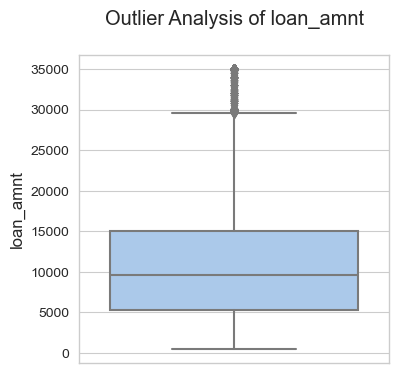

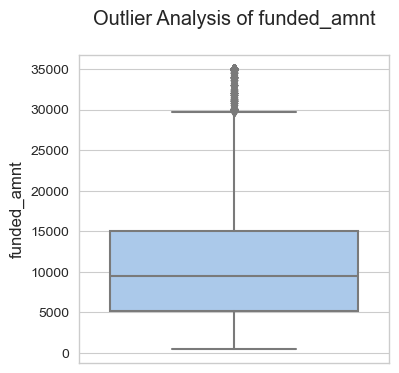

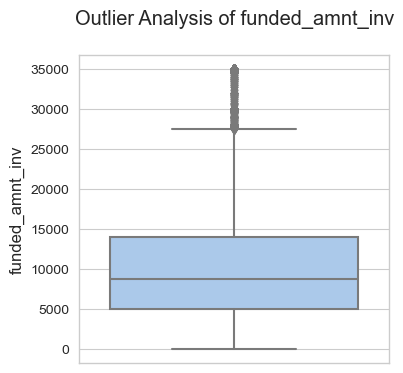

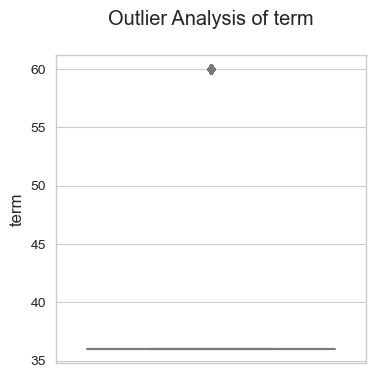

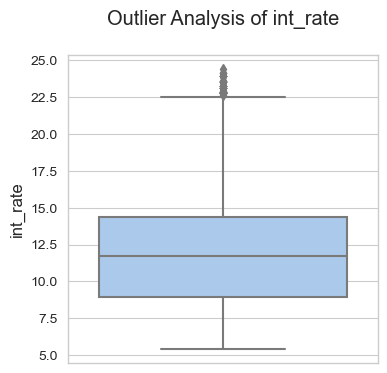

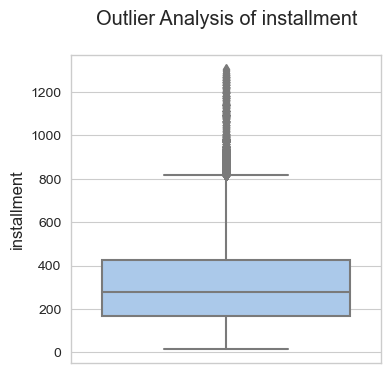

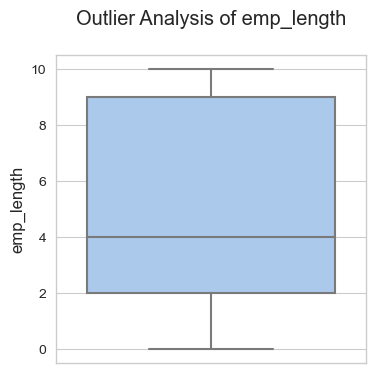

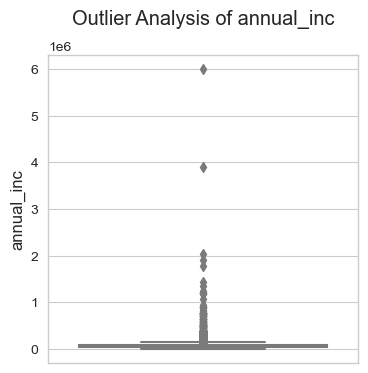

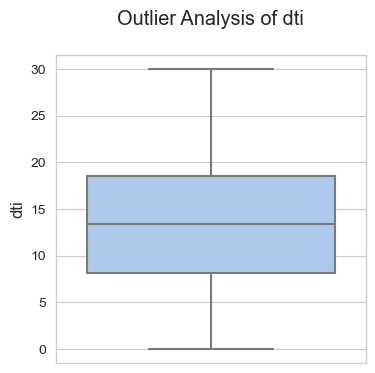

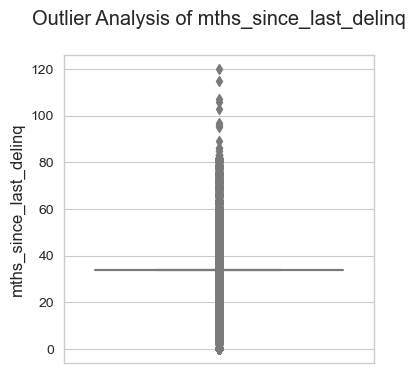

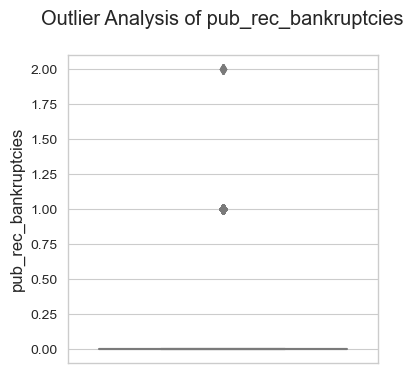

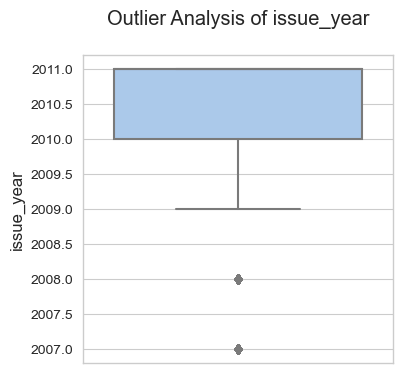

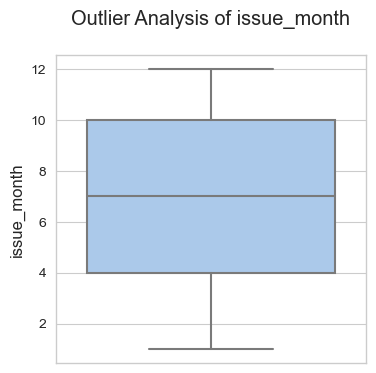

In [635]:
for col in loan:
    if loan[col].dtype!='object' :
        plt.figure(figsize=(4,4))
        sns.boxplot(y=loan[col])
        plt.title('Outlier Analysis of ' + col +'\n')
        plt.show()

* Loan Amount, Funded Amount & funded Amount by investor potentially has some outliers that lies after Q3 +1.5 *IQR but this can be acceptable as per the data distribution.
* Loan Term/ Tenure of Loan repaymnet has only two possible values (i.e) 36 and 60 months since arround 75% of customers took 36 months loan term 60 is lying outside th wiskers, so this column don't need outlier treatment
* Interest Rate has some values that were outisde the wiskers but this will not need any outlier treatment.
* Annual Income seems to have outliers that is way out of the IQR range and wiskers where the data is skewed to the right because of outliers - This column needs outlier treatment
* dti or Debt Income ratio is not having any potential outliers
* We can ignore pub_rec_bankrupties since the variable has only 4 possible unique value counts.


In [636]:
#Check the data with loan_amt more than 25000
loan[loan.loan_amnt > 25000]

# Outcome : There seems no signficant observation from outliers of  loan_amnt data and hence no action we will take

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
31         31825        31825      31825.00000    36      7.90       995.82   
51         25600        25600      25350.00000    36      9.91       824.96   
80         35000        22075      22050.00000    60     17.27       551.84   
112        26800        26800      26800.00000    60     20.89       723.38   
124        28000        11800      11775.00000    60     19.91       312.04   
...          ...          ...              ...   ...       ...          ...   
19800      32000        32000      31684.89912    60     20.85       863.01   
19811      32000        32000      31569.14450    60     19.74       843.19   
19825      30000        30000      29094.62328    60     16.40       735.94   
19838      30000        30000      30000.00000    60     17.88       759.85   
19857      35000        35000      34682.59813    60     20.48       936.66   

      grade sub_grade                           emp_title  emp_length  \
31        A        A4  Audubon Mutual Housing Corporation           5   
51        B        B1               City of Santa Monica            9   
80        D        D3           tutor Per ini Corporation           3   
112       F        F1   charlotte regional medical center           3   
124       E        E4                   American Airlines          10   
...     ...       ...                                 ...         ...   
19800     G        G3                Best Bath Store, LLC           5   
19811     F        F5                    DLA Piper LLP US           8   
19825     E        E1     Suffolk County Sheriff's office           6   
19838     E        E5         park dental care of astoria          10   
19857     G        G2                 NC State University           2   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
31          MORTGAGE     75000.0            Verified  Dec-11   Fully Paid   
51              RENT    110000.0            Verified  Dec-11   Fully Paid   
80          MORTGAGE    150000.0            Verified  Dec-11   Fully Paid   
112         MORTGAGE    120000.0            Verified  Dec-11   Fully Paid   
124             RENT     52000.0            Verified  Dec-11  Charged Off   
...              ...         ...                 ...     ...          ...   
19800           RENT     62400.0            Verified  Feb-11   Fully Paid   
19811           RENT     93500.0            Verified  Feb-11   Fully Paid   
19825       MORTGAGE    110000.0        Not Verified  Feb-11   Fully Paid   
19838       MORTGAGE    360000.0     Source Verified  Feb-11   Fully Paid   
19857       MORTGAGE    250000.0            Verified  Feb-11   Fully Paid   

                  purpose                                title addr_state  \
31     debt_consolidation              Debt Consolidation Loan         NJ   
51            credit_card           Credit card refinance loan         CA   
80       home_improvement                     Home improvement         NY   
112    debt_consolidation                          credit loan         FL   
124    debt_consolidation                   Debt Consalidation         TX   
...                   ...                                  ...        ...   
19800  debt_consolidation  Debt Consolidation for organization         MA   
19811  debt_consolidation                     Want to be Free!         NY   
19825  debt_consolidation              Debt Consolidation Loan         NY   
19838  debt_consolidation                   2011 consolidation         NY   
19857         credit_card                   Credit Card Payoff         NC   

         dti  mths_since_last_delinq  pub_rec_bankruptcies  issue_year  \
31     14.03                    34.0                   0.0        2011   
51     15.71                    34.0                   0.0        2011   
80      7.51                    35.0                   0.0        2011   
112    12.15                    34.

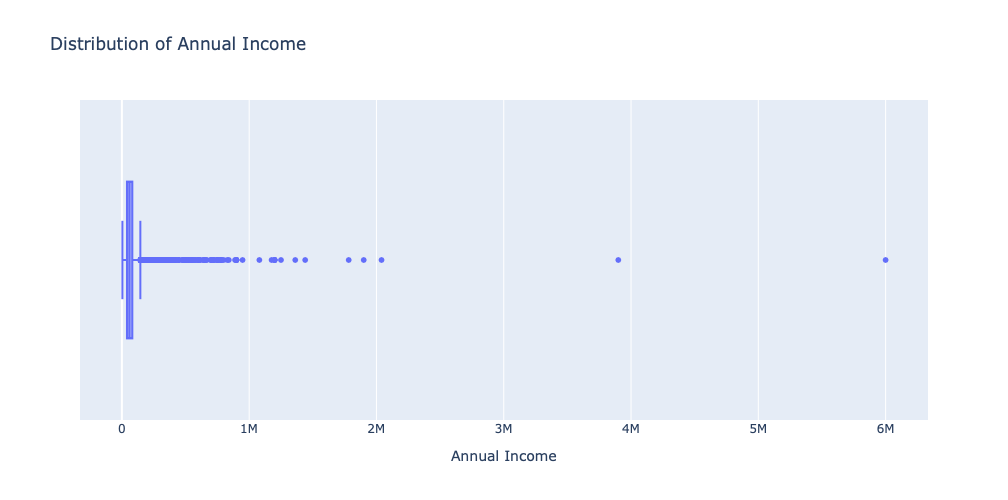

In [637]:
#Create a box plot for the annual_inc column
# Trying plotly.express for boxplot
px.box(loan,x='annual_inc',width=600,height=500,title='Distribution of Annual Income',labels={'annual_inc':'Annual Income'}).show()

In [638]:
# Observation : We observed that upper fence is 145k and maximum is 6M which is huge gap and hence we can check our data in oredr to remove outliers
loan[loan['annual_inc']>200000]

#Nothing major was able to identify but high level from boxplot we can say outliers are above percentile : 75%

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
170        25000        25000      25000.00000    36     12.42       835.39   
336        35000        23150      21739.74813    60     17.27       578.71   
392         5000         5000       5000.00000    36      6.62       153.52   
567         2000         2000       2000.00000    36      9.91        64.45   
717        28000        28000      28000.00000    36     15.96       983.85   
...          ...          ...              ...   ...       ...          ...   
39611      25000         5650        725.00000    36     14.38       194.15   
39645      10000        10000       2925.00000    36     11.54       329.95   
39669       6500         6500        225.00000    36     15.01       225.37   
39673       5000         5000       1475.00000    36      7.75       156.11   
39692       5000         5000       1775.00000    36      9.01       159.03   

      grade sub_grade                                 emp_title  emp_length  \
170       B        B4                              McGraw- Hill           2   
336       D        D3  Fed Govt-Environmental Protection Agency           8   
392       A        A2                   STRAIGHT LINE LOGISTICS           1   
567       B        B1                                   Comcast           1   
717       C        C5                            Blank Rome LLP           5   
...     ...       ...                                       ...         ...   
39611     E        E4                                      MSIP           2   
39645     C        C5                  Affinity Marketing Group           9   
39669     F        F1                     Universal Advertising           9   
39673     A        A3               Otolaryngology/ENT Practice           1   
39692     B        B2                          Ping Interactive           1   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
170             RENT    225000.0            Verified  Dec-11   Fully Paid   
336         MORTGAGE    208000.0     Source Verified  Dec-11   Fully Paid   
392             RENT    276000.0     Source Verified  Dec-11   Fully Paid   
567         MORTGAGE    231252.0     Source Verified  Dec-11   Fully Paid   
717         MORTGAGE    235000.0     Source Verified  Dec-11   Fully Paid   
...              ...         ...                 ...     ...          ...   
39611       MORTGAGE    480000.0        Not Verified  Oct-07   Fully Paid   
39645       MORTGAGE    225000.0        Not Verified  Sep-07   Fully Paid   
39669       MORTGAGE    213000.0        Not Verified  Aug-07  Charged Off   
39673       MORTGAGE    225000.0        Not Verified  Aug-07   Fully Paid   
39692       MORTGAGE    250000.0        Not Verified  Jul-07   Fully Paid   

                  purpose                        title addr_state    dti  \
170    debt_consolidation           Consolidation loan         NJ   8.32   
336    debt_consolidation           Debt Consolidation         MD   7.94   
392    debt_consolidation  DEBT CONSOLIDATION STRATEGY         FL   1.82   
567                 other           Loan to Fix Carpet         GA  11.43   
717           credit_card             Credit Card Loan         VA   9.08   
...                   ...                          ...        ...    ...   
39611      small_business                Business loan         NY   2.40   
39645  debt_consolidation                Personal loan         MA  20.00   
39669      small_business  Business Financing Aug 2007         GA   6.45   
39673    home_improvement        Backyard improvements         WI   6.48   
39692               other                 ..and a Pony         NY  10.00   

       mths_since_last_delinq  pub_rec_bankruptcies  issue_year  issue_month  
170                      13.0                   0.0        2011           12  
336                      24.0                   0.0        2011           12  
392                      34.0     

In [639]:
# when we dont have much observation we can go at what percentile our upper fence is lying
# checking various percentiles but in end 99 percentile is having greater than 145k
import numpy as np
np.percentile(loan.annual_inc,99)

234143.99999999878

In [640]:
# checking number of rows for our 99th percentile condition
loan=loan[loan.annual_inc<=np.percentile(loan.annual_inc,99)]

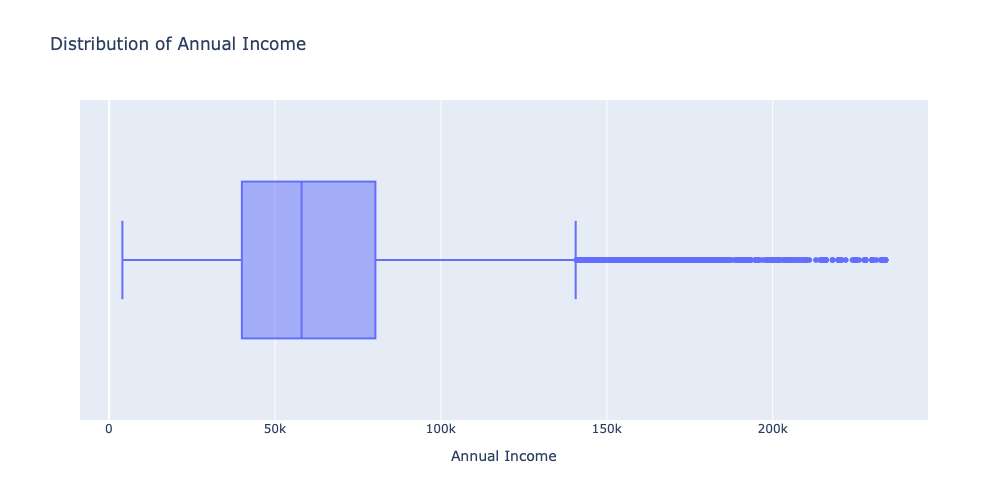

In [641]:
#Create a box plot for the annual_inc column
# Trying plotly.express for boxplot
px.box(loan,x='annual_inc',width=600,height=500,title='Distribution of Annual Income',labels={'annual_inc':'Annual Income'}).show()

In [642]:
loan.shape

(38191, 23)

## Adding Derived Metrics for Data Analysis


### loan_chargedoff

* Creating a field called largedoff to check whether a borrower charged off a loan or not

In [643]:
loan['loan_chargedoff']= np.where(loan['loan_status'] =='Charged Off',1,0)

In [644]:
loan['loan_chargedoff'].value_counts()


0    32607
1     5584
Name: loan_chargedoff, dtype: int64

In [645]:
loan['loan_status'].value_counts()

Fully Paid     32607
Charged Off     5584
Name: loan_status, dtype: int64

## loan_fullypaid

* Creating a field called loan_fullypaid to check whether a borrower completely paid his loan or not

In [646]:
loan['loan_fullypaid']= np.where(loan['loan_status'] =='Fully Paid',1,0)
loan['loan_fullypaid'].value_counts()
loan['loan_status'].value_counts()


Fully Paid     32607
Charged Off     5584
Name: loan_status, dtype: int64

## own_house & Income Verified
Creating a field called own_house to check whether a borrower has own house or not and income verification

In [647]:
loan['own_house']= np.where(loan['home_ownership'] =='OWN',1,0)
loan['home_ownership'].value_counts()

RENT        18397
MORTGAGE    16748
OWN          2947
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [648]:
loan['income_verified']=np.where(loan['verification_status'] =='Verified',1,0)
loan['income_verified'].value_counts()

0    26160
1    12031
Name: income_verified, dtype: int64

# Data Analysis

### Check Points:
Checking for outliers from the applicable columns to remove any outlier that will deviate the analysis and may affect the final model

In [649]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'mths_since_last_delinq', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'loan_chargedoff', 'loan_fullypaid', 'own_house',
       'income_verified'],
      dtype='object')

### Data Distribution analysis for the below Loan Amounts:

* loan_amnt:The Loan amount is the initally requested amount by the customer as per his requirmenet
* funded_amnt:The funded amount is the amount proposed by the lending club after analysing the potential risks for that customers and his portfolio.
* funded_amnt_inv: The total loan amount processed by the Investor as per their organizations financial threshold and norms.

In [650]:
Numerical=[col for col in loan if loan[col].dtype!='object']
Categorical=[col for col in loan if loan[col].dtype=='object']


In [651]:
Numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'mths_since_last_delinq',
 'pub_rec_bankruptcies',
 'issue_year',
 'issue_month',
 'loan_chargedoff',
 'loan_fullypaid',
 'own_house',
 'income_verified']

In [652]:
Categorical

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'addr_state']

# Univariate Analysis

Here we will cover 3 types:

1. Quantitative/ Numerical 
2. Unordered Categorical 
3. Ordered Categorical

# 1. Quantitative/ Numerical Univariate Analysis

- 'loan_amnt',
- 'term',
- 'int_rate',
- 'emp_length',
- 'annual_inc',
- 'issue_year',
- 'dti'


## Univariate - loan_amnt

In [653]:
loan['loan_amnt'].describe()

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

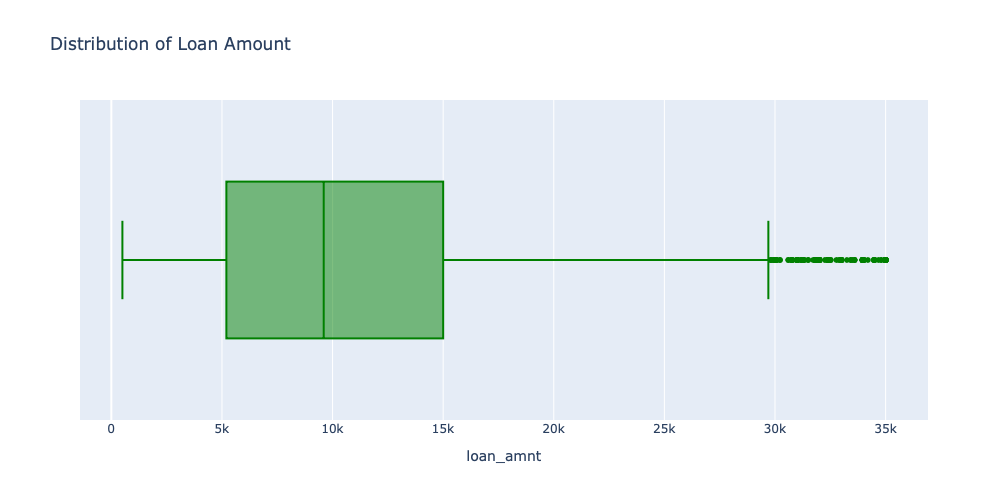

In [654]:
#Create a box plot for the loan_amnt column
px.box(loan,x='loan_amnt',width=700,height=500,title='Distribution of Loan Amount',labels={'loan_amt':'Loan Amount'},color_discrete_sequence=["green"]).show()

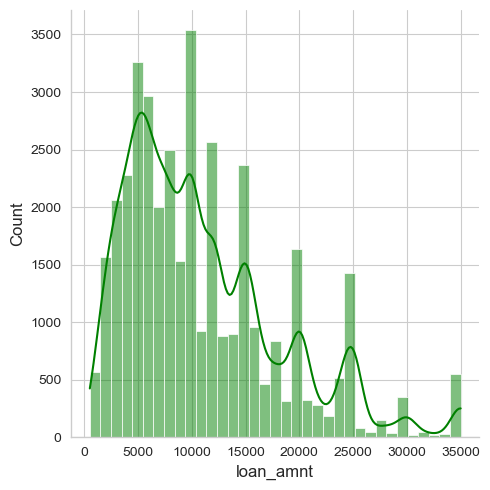

In [655]:
#Using Seaborn
sns.displot(data=loan,x='loan_amnt',bins=35,kde=True,color='green')
#plt.show()
plt.tight_layout()

## Insights for Loan Amount:

* The values lies in between 500 -35000
* Maximum Density Lies arround 25% (in between 5000 -10000)

## Univariate - term

In [656]:
loan['term'].describe()

count    38191.000000
mean        41.889555
std         10.327887
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

In [657]:
round(loan['term'].value_counts()*100/len(loan['term']))

36    75.0
60    25.0
Name: term, dtype: float64

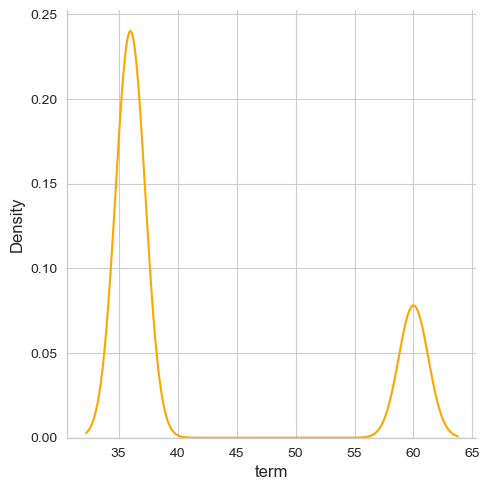

In [658]:
sns.displot(data=loan,x='term',kind='kde',color='orange')
plt.show()

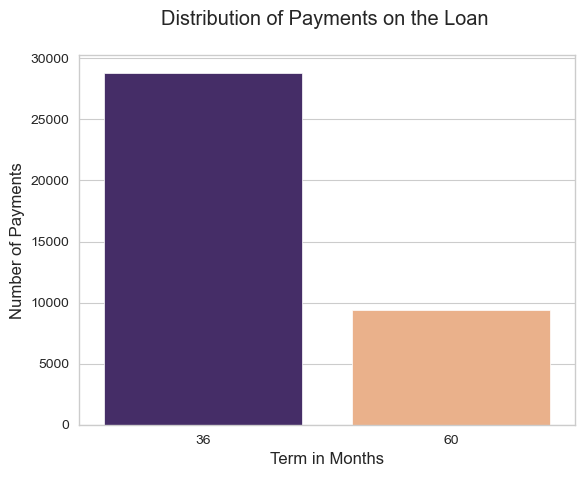

In [659]:
sns.countplot(x ='term', data = loan,palette=['#432371',"#FAAE7B"])
plt.xlabel('Term in Months')
plt.ylabel('Number of Payments')
plt.title('Distribution of Payments on the Loan \n')
# Show the plot
plt.show()

## Insights for term
* 75% of the loans are for term 36 month

# Univariate For  'Interest Rate' (int_rate)

In [660]:
loan.int_rate.describe()

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

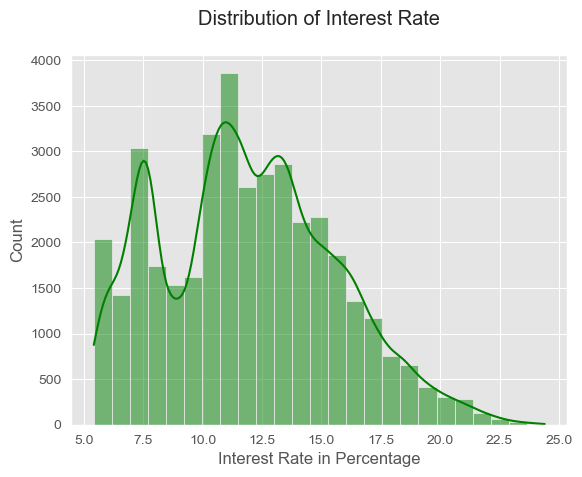

In [661]:

#sns.set_theme(style="whitegrid", palette="pastel")
plt.style.use("ggplot")
sns.histplot(data=loan, x='int_rate',bins=25,kde=True,color='green')
plt.xlabel('Interest Rate in Percentage')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate\n')
plt.show()

## Insights

 Majority of loans are lying in the range of these interest rates
* 7-8%
* 11-12%

## Univariate for Emp_length

In [662]:
loan['emp_length'].describe()

count    38191.000000
mean         4.916211
std          3.450969
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

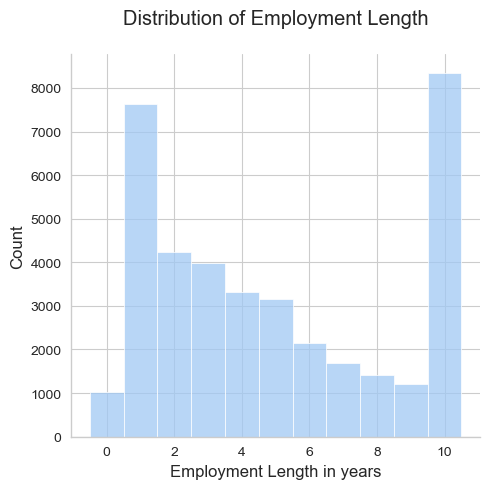

In [663]:
sns.set_style('whitegrid')
sns.set_palette("pastel")
#plt.style.use("white")
sns.displot(data=loan, x='emp_length',bins=[0,1, 2, 3, 4, 5, 6, 7,8,9,10],discrete=True)
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length\n')
#plt.show()
plt.tight_layout()

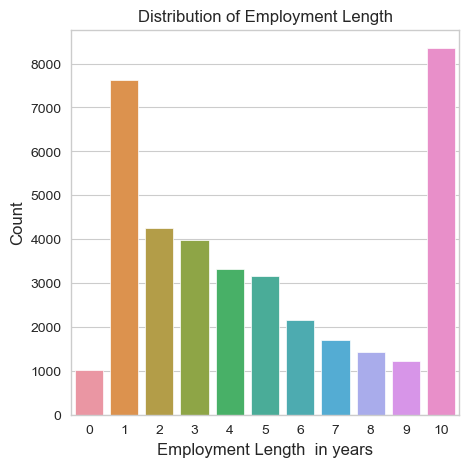

In [664]:
# We can also use countplot
plt.figure(figsize=(5,5))
sns.countplot(loan.emp_length)
plt.xlabel('Employment Length  in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

## Insights for emp_length

* Distribution of data is maximum for people who has 10 years of employment length
* We have explicitly converted the < 1 year to 1 and null data's to 0.


## Univariate - annual_inc

In [665]:
loan['annual_inc'].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

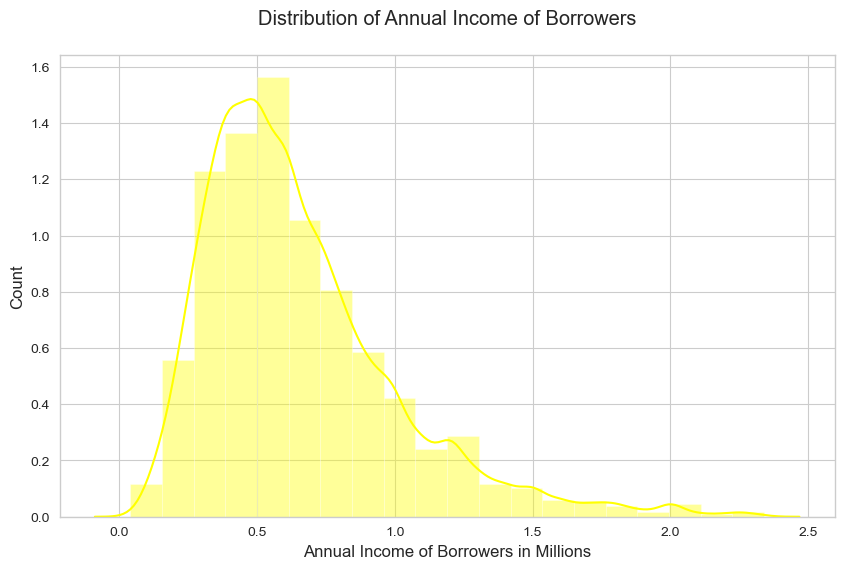

In [666]:
plt.figure(figsize=(10, 6))
sns.distplot(loan['annual_inc'].astype(int)/100000,bins=20,color='yellow')
plt.xlabel('Annual Income of Borrowers in Millions')
plt.ylabel('Count')
plt.title('Distribution of Annual Income of Borrowers\n')
plt.show()

## Insights for annual_inc
Distribution is left side
- There are more borrowers who has less anuual income and 


## Univariate - dti

In [667]:
loan['dti'].describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

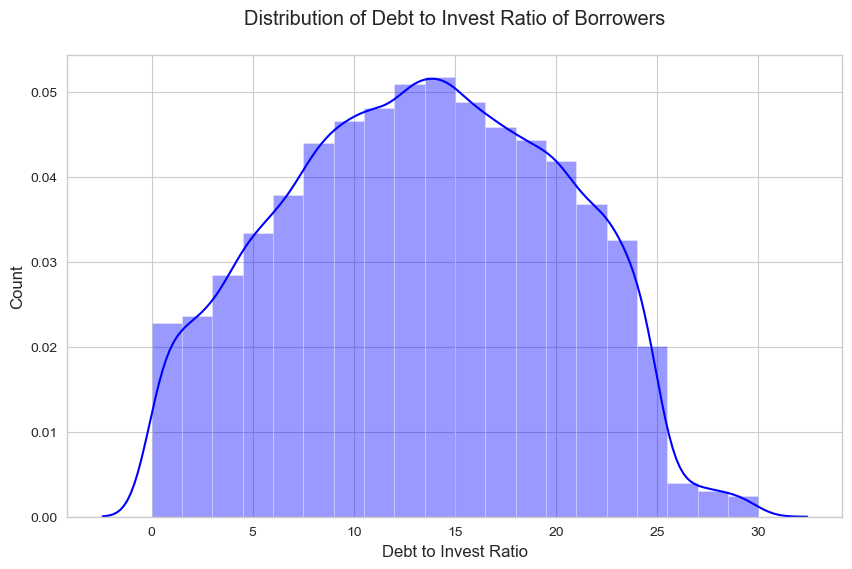

In [668]:
plt.figure(figsize=(10, 6))
sns.distplot(loan['dti'],bins=20,color='blue')
plt.xlabel('Debt to Invest Ratio')
plt.ylabel('Count')
plt.title('Distribution of Debt to Invest Ratio of Borrowers\n')
plt.show()

## Insights for dti:

- Curve is normalised
- More density is around the inter quartile range of data

## Univariate - issue_year

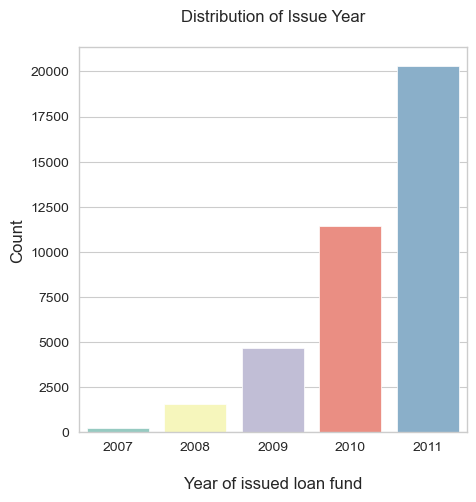

In [669]:
plt.figure(figsize=(5,5))
sns.countplot(loan.issue_year,palette="Set3")
plt.xlabel('\nYear of issued loan fund')
plt.ylabel('Count')
plt.title('Distribution of Issue Year\n',fontsize=12)
plt.show()

### Insights : issue_year
- Incremental loan has been issued over the years

##  Unordered and Ordered Categorical Univariate Analysis
 
**Unordered** :
- 'loan_status' 
- 'home_ownership',
- 'verification_status',
- 'purpose',
- 'addr_state'

**Ordered**
- 'grade'
- 'subgrade'


## Univariate - Loan status

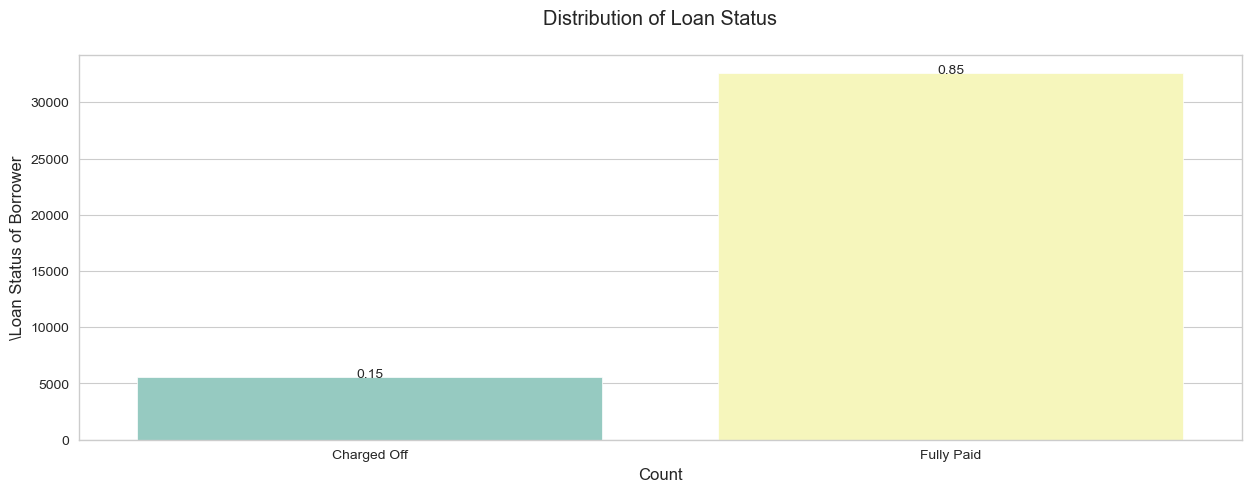

In [670]:
plt.figure(figsize=(15,5))
total = float(len(loan))
ax = sns.countplot(x=sorted(loan.loan_status), palette="Set3")
plt.ylabel('\Loan Status of Borrower')
plt.xlabel('Count')
plt.title("Distribution of Loan Status\n")
# Looping now:
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")
plt.show()

## Insights for loan_status
- There are more borrowers who have Fully-Paid than Charged-off

## Univariate - home_ownership

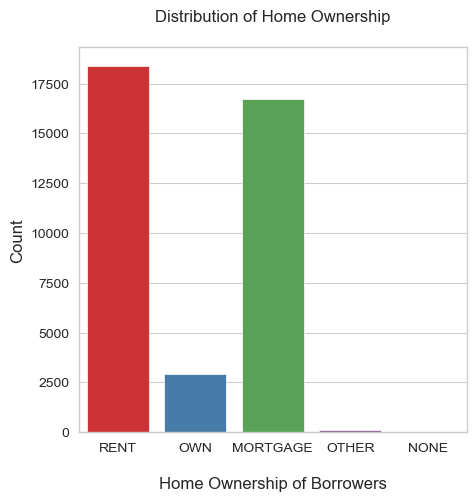

In [671]:
plt.figure(figsize=(5,5))
sns.countplot(loan.home_ownership,palette="Set1" )
plt.xlabel('\nHome Ownership of Borrowers')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership\n',fontsize=12)

plt.show()

## Insights for home_ownership
- There are more borrowers who does not owns home 


## Univariate - verification_status

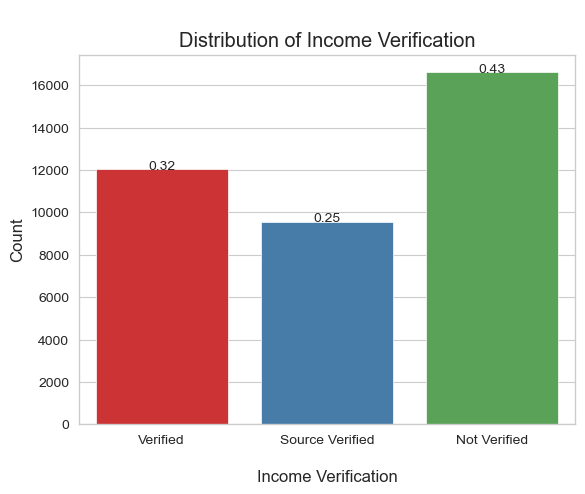

<Figure size 500x500 with 0 Axes>

In [672]:
# Total Count of loan dataset 
total = float(len(loan))
ax = sns.countplot(x="verification_status",data=loan, palette="Set1")
plt.xlabel('\nIncome Verification')
plt.ylabel('Count')
plt.title('\nDistribution of Income Verification')
plt.figure(figsize=(5,5))
# Looping now:
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")

## Insights for verification_status

- 0.44% of loan data has not Verified income of borrower

## Univariate - purpose

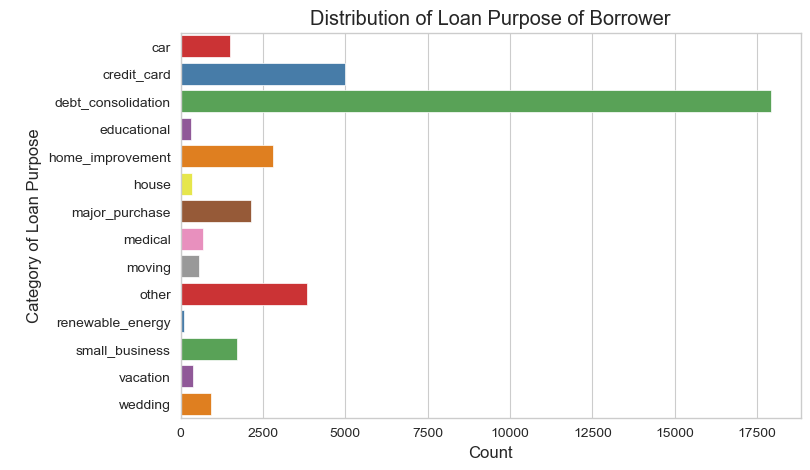

In [673]:
plt.figure(figsize=(8,5))
sns.countplot(y=sorted(loan.purpose),palette="Set1")
plt.ylabel('\nCategory of Loan Purpose')
plt.xlabel('Count')
plt.title('Distribution of Loan Purpose of Borrower')
#plt.xticks(rotation=90)
plt.show()

## Insights for purpose

- Majority of loan request are for debt consolidation

## Univariate - addr_state

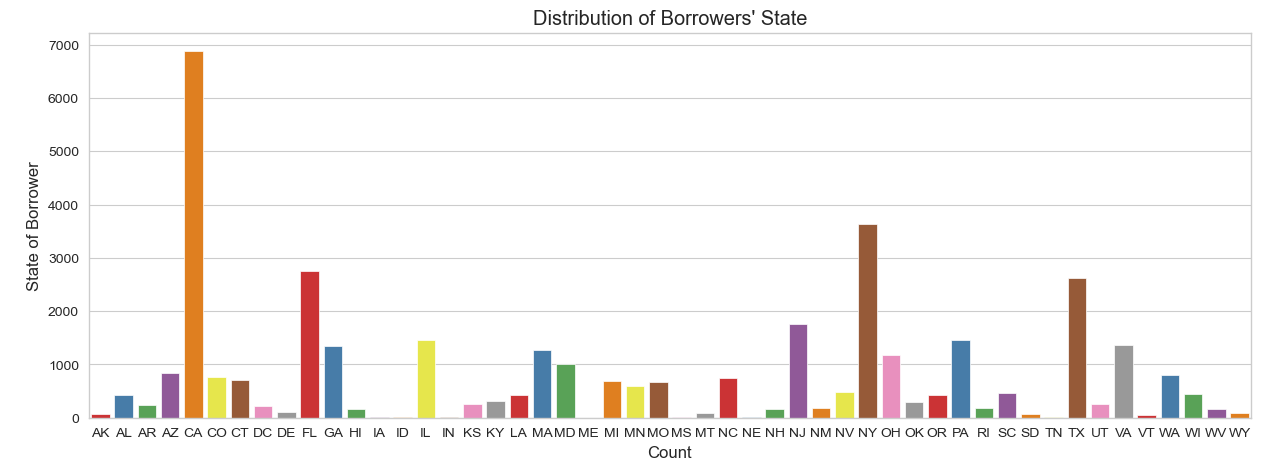

In [674]:
plt.figure(figsize=(15,5))
sns.countplot(x=sorted(loan.addr_state), palette="Set1")
plt.ylabel('\nState of Borrower')
plt.xlabel('Count')
plt.title("Distribution of Borrowers' State")
plt.show()

## Insights for addr_state

- Majority of borrowers request are from CA,NY,FL,TX

## Univariate - grade and subgrade

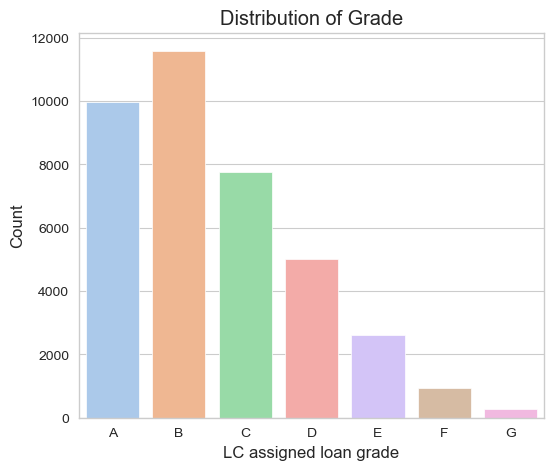

In [675]:
plt.figure(figsize=(6,5))
sns.countplot(sorted(loan.grade))
plt.xlabel('LC assigned loan grade')
plt.ylabel('Count')
plt.title('Distribution of Grade')
plt.show()

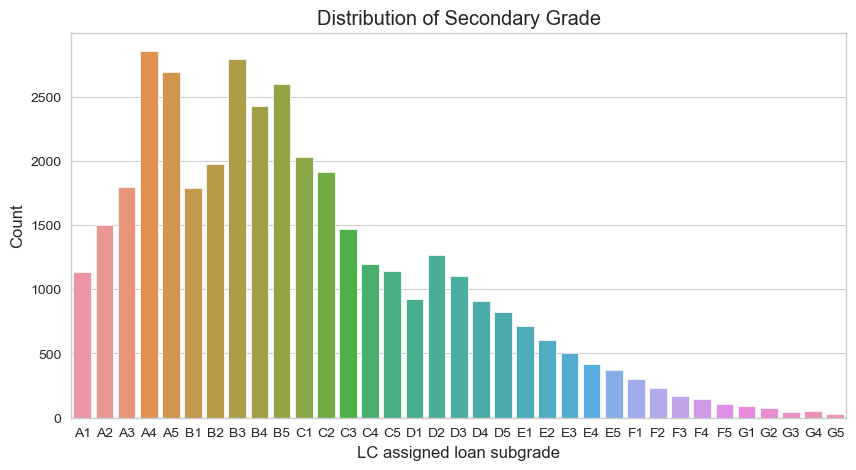

In [676]:
plt.figure(figsize=(10,5))
sns.countplot(sorted(loan.sub_grade))
plt.xlabel('LC assigned loan subgrade')
plt.ylabel('Count')
plt.title('Distribution of Secondary Grade')
plt.show()

## Insights for:
**Grade** : Most borrowers have grades of 'A' and 'B' 

**Sub Grade** : Most borrowers have sub grades of 'A' and 'B' only which is the same pattern with grade

# Segmented Univariate Analysis

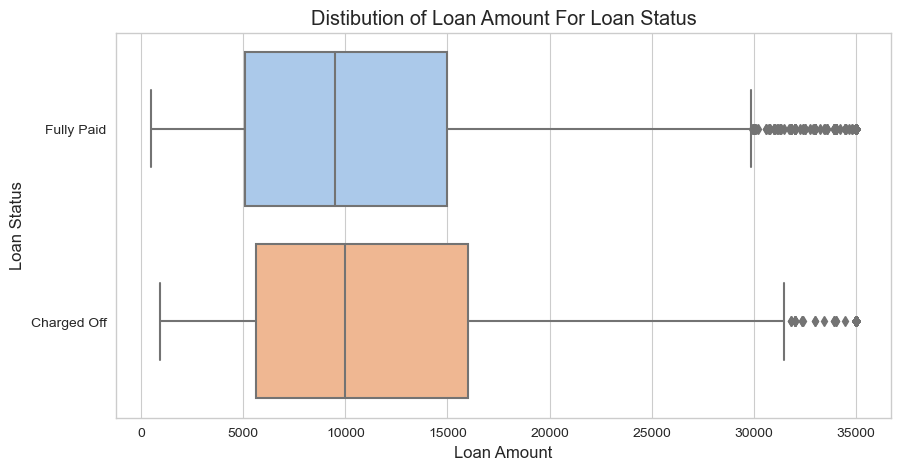

In [677]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status')
plt.show()

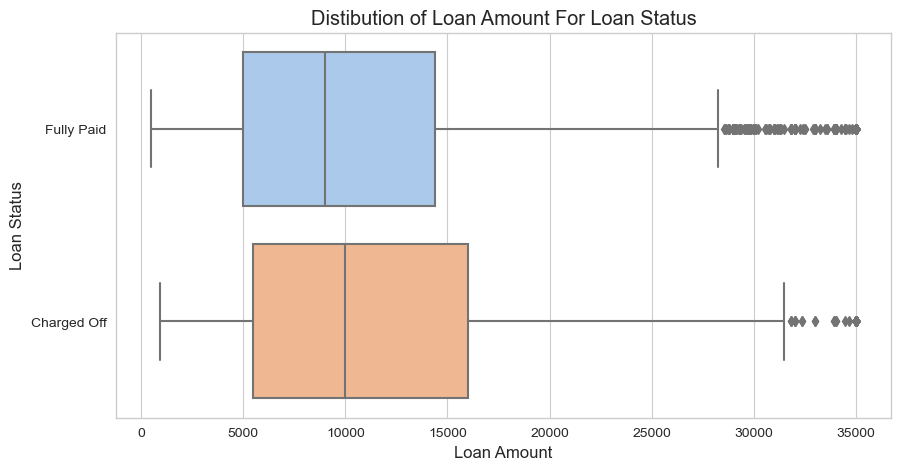

In [678]:
# Lets see for funded_amnt

plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='funded_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status')
plt.show()

# Insights for loan_amnt to loan_status: 
Loan Status is Fully Paid when Loan amount is less

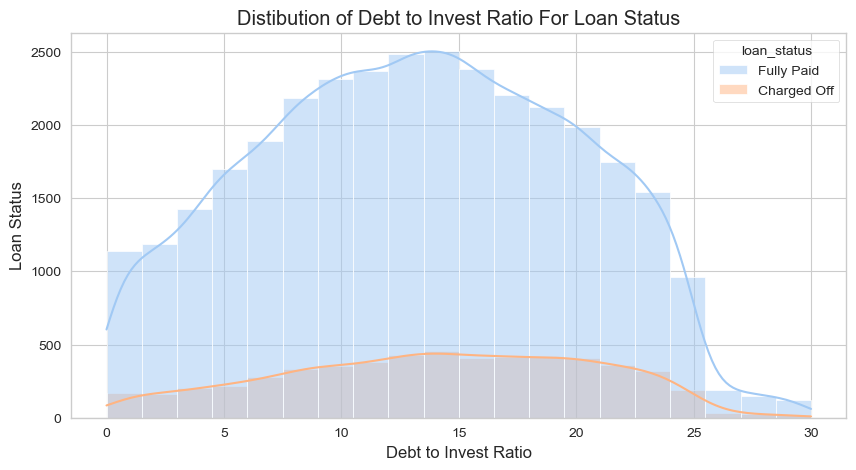

In [679]:
# Distribution of dti based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=20,kde=True)
plt.xlabel('Debt to Invest Ratio')
plt.ylabel('Loan Status')
plt.title('Distibution of Debt to Invest Ratio For Loan Status')
plt.show()

## Insights for dti to loan status:
If dti peak is in range of 10-15 where there are more borrowers who pays Fully-charged in comparison to Charged-off

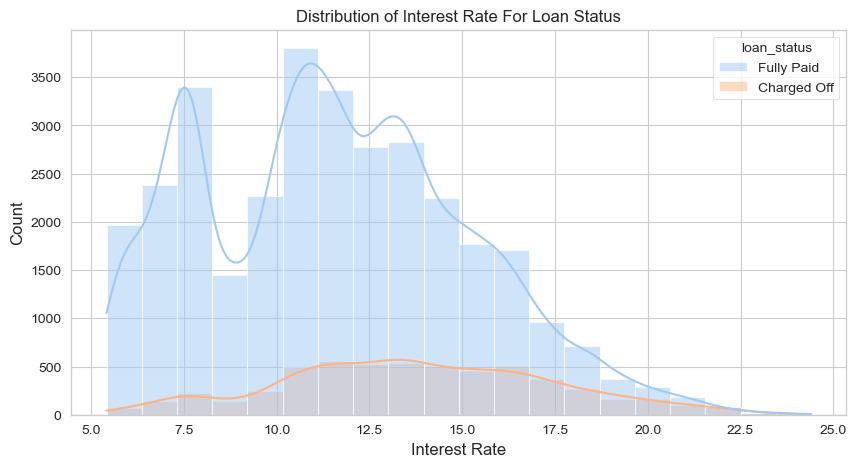

In [680]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

# Insights for Interest rate to Loan Status:
When Interest rate is less then its high likely to have loan status= full paid

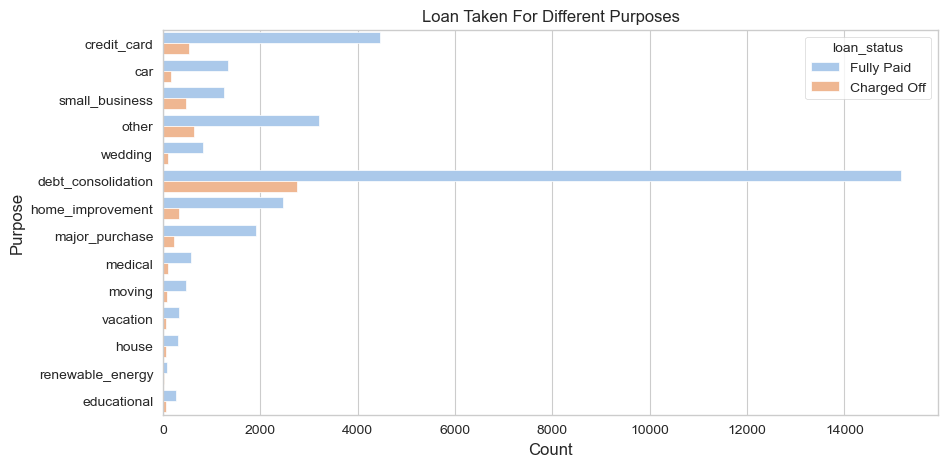

In [681]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

# Insights for purpose based on loan_status:
- Even for majority of purpose we have higher chances of deafult/charged-off

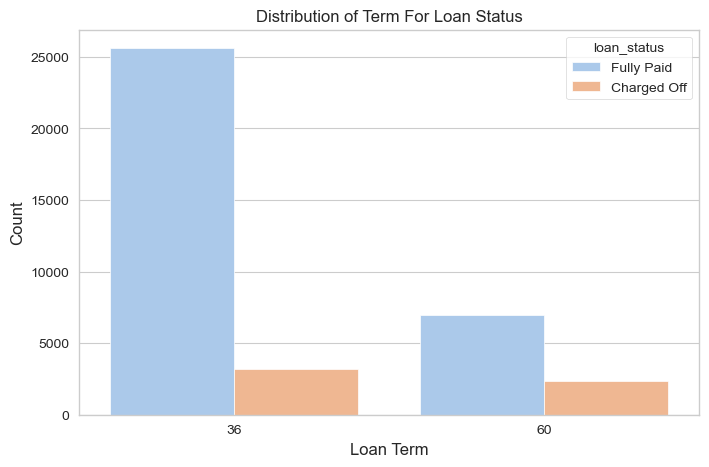

In [682]:
# Distribution of Term based on loan_status
plt.figure(figsize=(8,5))
sns.countplot(data=loan,x='term',hue='loan_status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

## Insights : Lesser the term more the loan status is Fully Paid

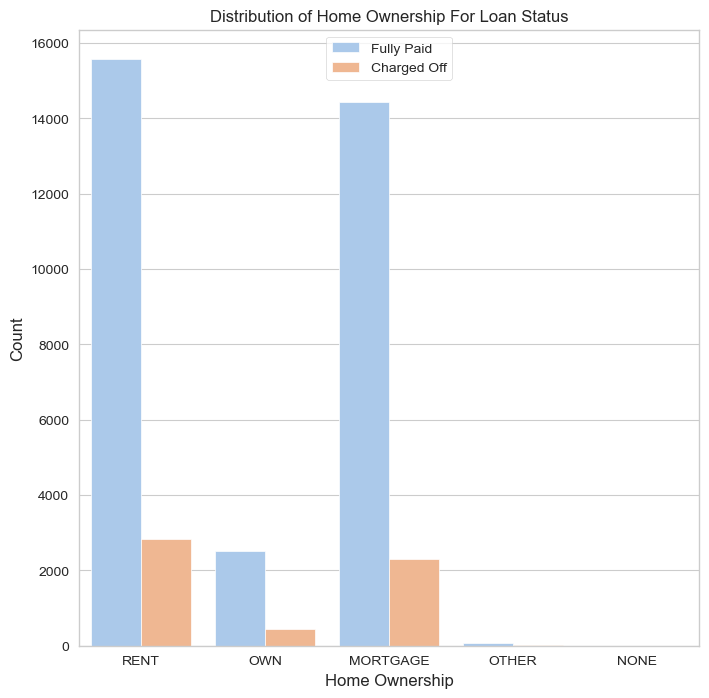

In [683]:
# Distribution of Home Ownership based on loan_status
plt.figure(figsize=(8,8))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

## Insights: The chances of default/charged off  is lower for those borrowers who own their property

## Bivariate Analysis

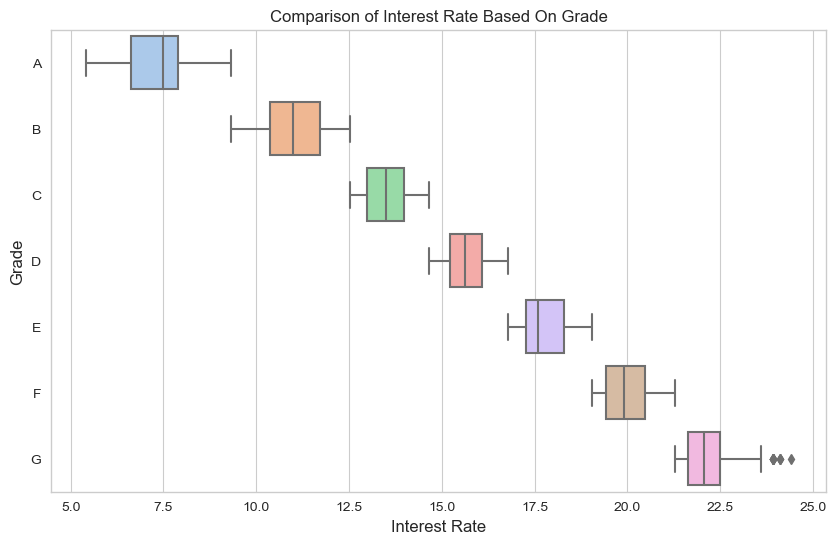

In [684]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,6))
sns.boxplot(data=loan,x=sorted(loan['int_rate']),y=sorted(loan['grade']))
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

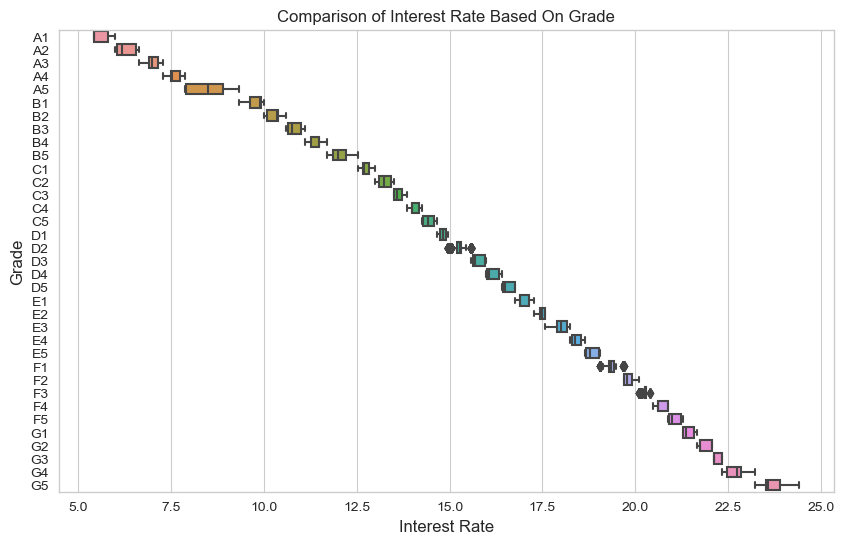

In [685]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,6))
sns.boxplot(data=loan,x=sorted(loan['int_rate']),y=sorted(loan['sub_grade']))
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

# Insights :
- Borrowers who have less interest rates have higher grades and sub-grades
- 7-13 % interset rate is with higher grades 

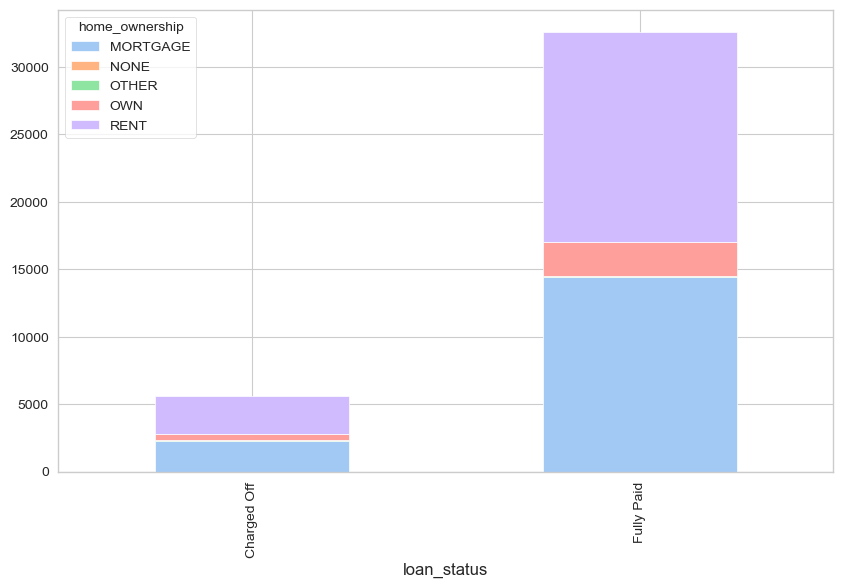

In [687]:
##Change the aggregation to median
df=pd.pivot_table(data=loan, index="loan_status", columns="home_ownership", values='loan_amnt', aggfunc=np.count_nonzero)

##Plot the stacked bar chart.
df.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

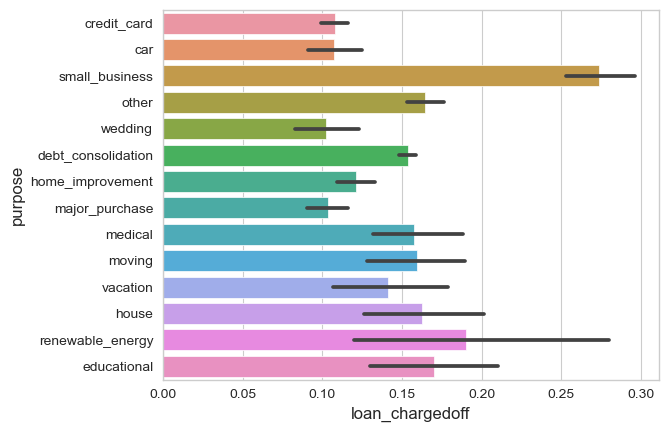

In [688]:
sns.barplot(x='loan_chargedoff',y='purpose',data=loan) 

plt.show()


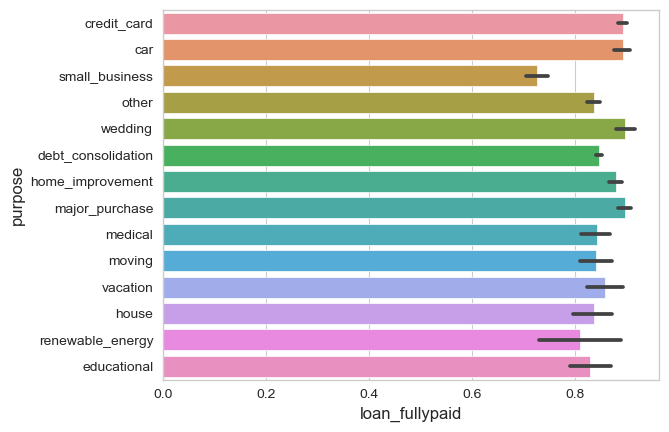

In [689]:
sns.barplot(x='loan_fullypaid',y='purpose',data=loan) 
plt.show()

# Insights : 
- "small Business' purpose" are likely to deafult mostly

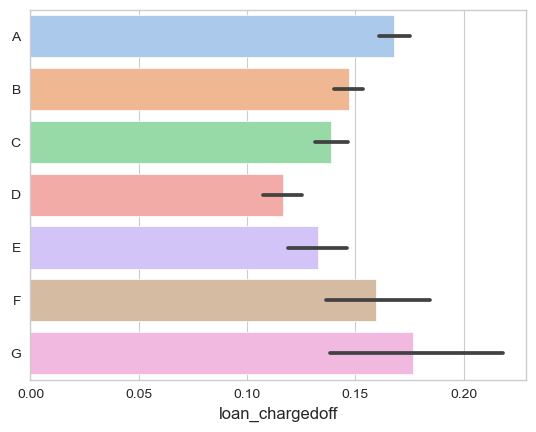

In [690]:
sns.barplot(x='loan_chargedoff',y=sorted(loan['grade']),data=loan) 
plt.show()

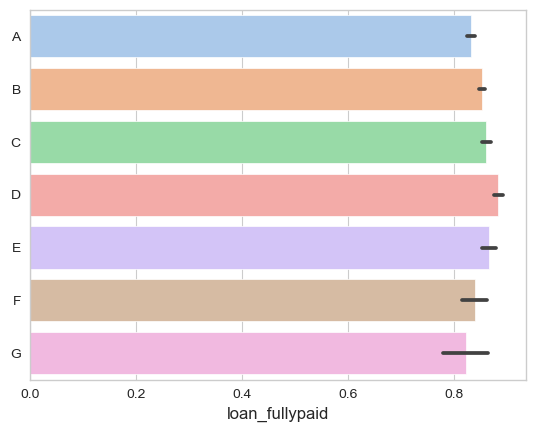

In [691]:
sns.barplot(x='loan_fullypaid',y=sorted(loan['grade']),data=loan) 
plt.show()

# Insights :
That Grades A & G are more likely to deafult in comparison to other grades

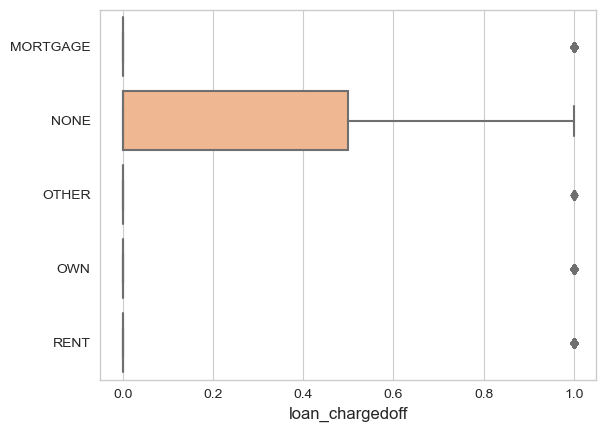

In [693]:
sns.boxplot(x='loan_chargedoff',y=sorted(loan['home_ownership']),data=loan) 
plt.show()

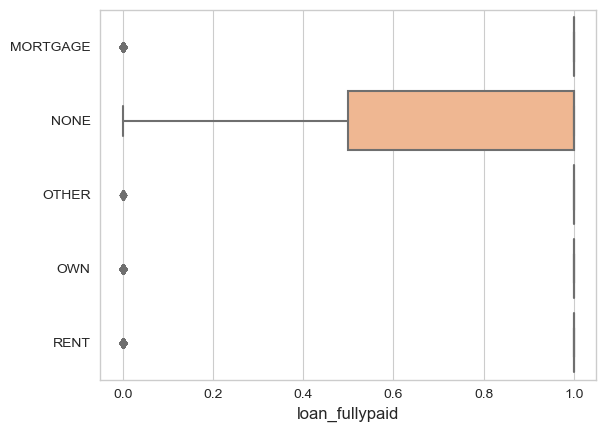

In [694]:
sns.boxplot(x='loan_fullypaid',y=sorted(loan['home_ownership']),data=loan) 
plt.show()

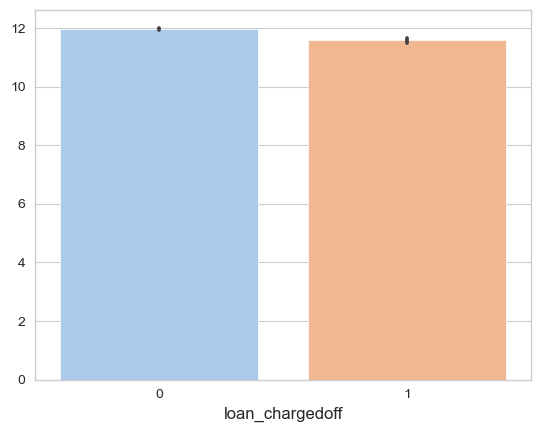

In [695]:
sns.barplot(x='loan_chargedoff',y=sorted(loan['int_rate']),data=loan) 
plt.show()

In [696]:
# Analysis for funded_amnt over term for loan status
# We wnat to analyse for what term 
funded_amnt_home = loan.pivot_table(values = 'funded_amnt',index = 'term',columns = 'loan_status',aggfunc = np.count_nonzero,fill_value = 0,margins = True,margins_name = 'Total')
funded_amnt_home

loan_status  Charged Off  Fully Paid  Total
term                                       
36                  3201       25618  28819
60                  2383        6989   9372
Total               5584       32607  38191

In [697]:
##Store the table in a separate variable
term_int_rate = pd.pivot_table(data=loan, values="loan_amnt", index="term", columns="loan_status", aggfunc=np.median)
term_int_rate

loan_status  Charged Off  Fully Paid
term                                
36                  8000        8000
60                 15000       14400

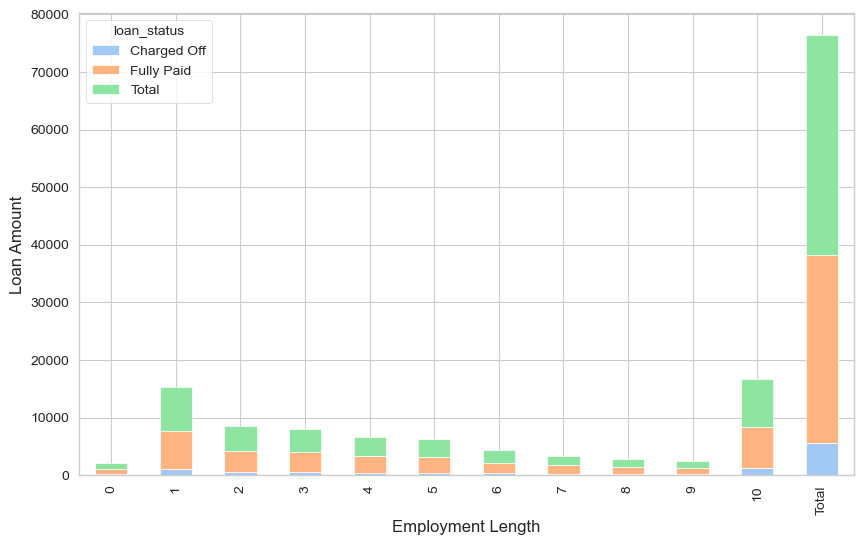

In [698]:
##Change the aggregation to median
df=pd.pivot_table(data=loan, index="emp_length", columns="loan_status", values='loan_amnt', aggfunc=np.count_nonzero,fill_value = 0,margins=True,margins_name='Total')

##Plot the stacked bar chart.
df.plot(kind="bar", stacked="True", figsize=[10,6])
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.show()

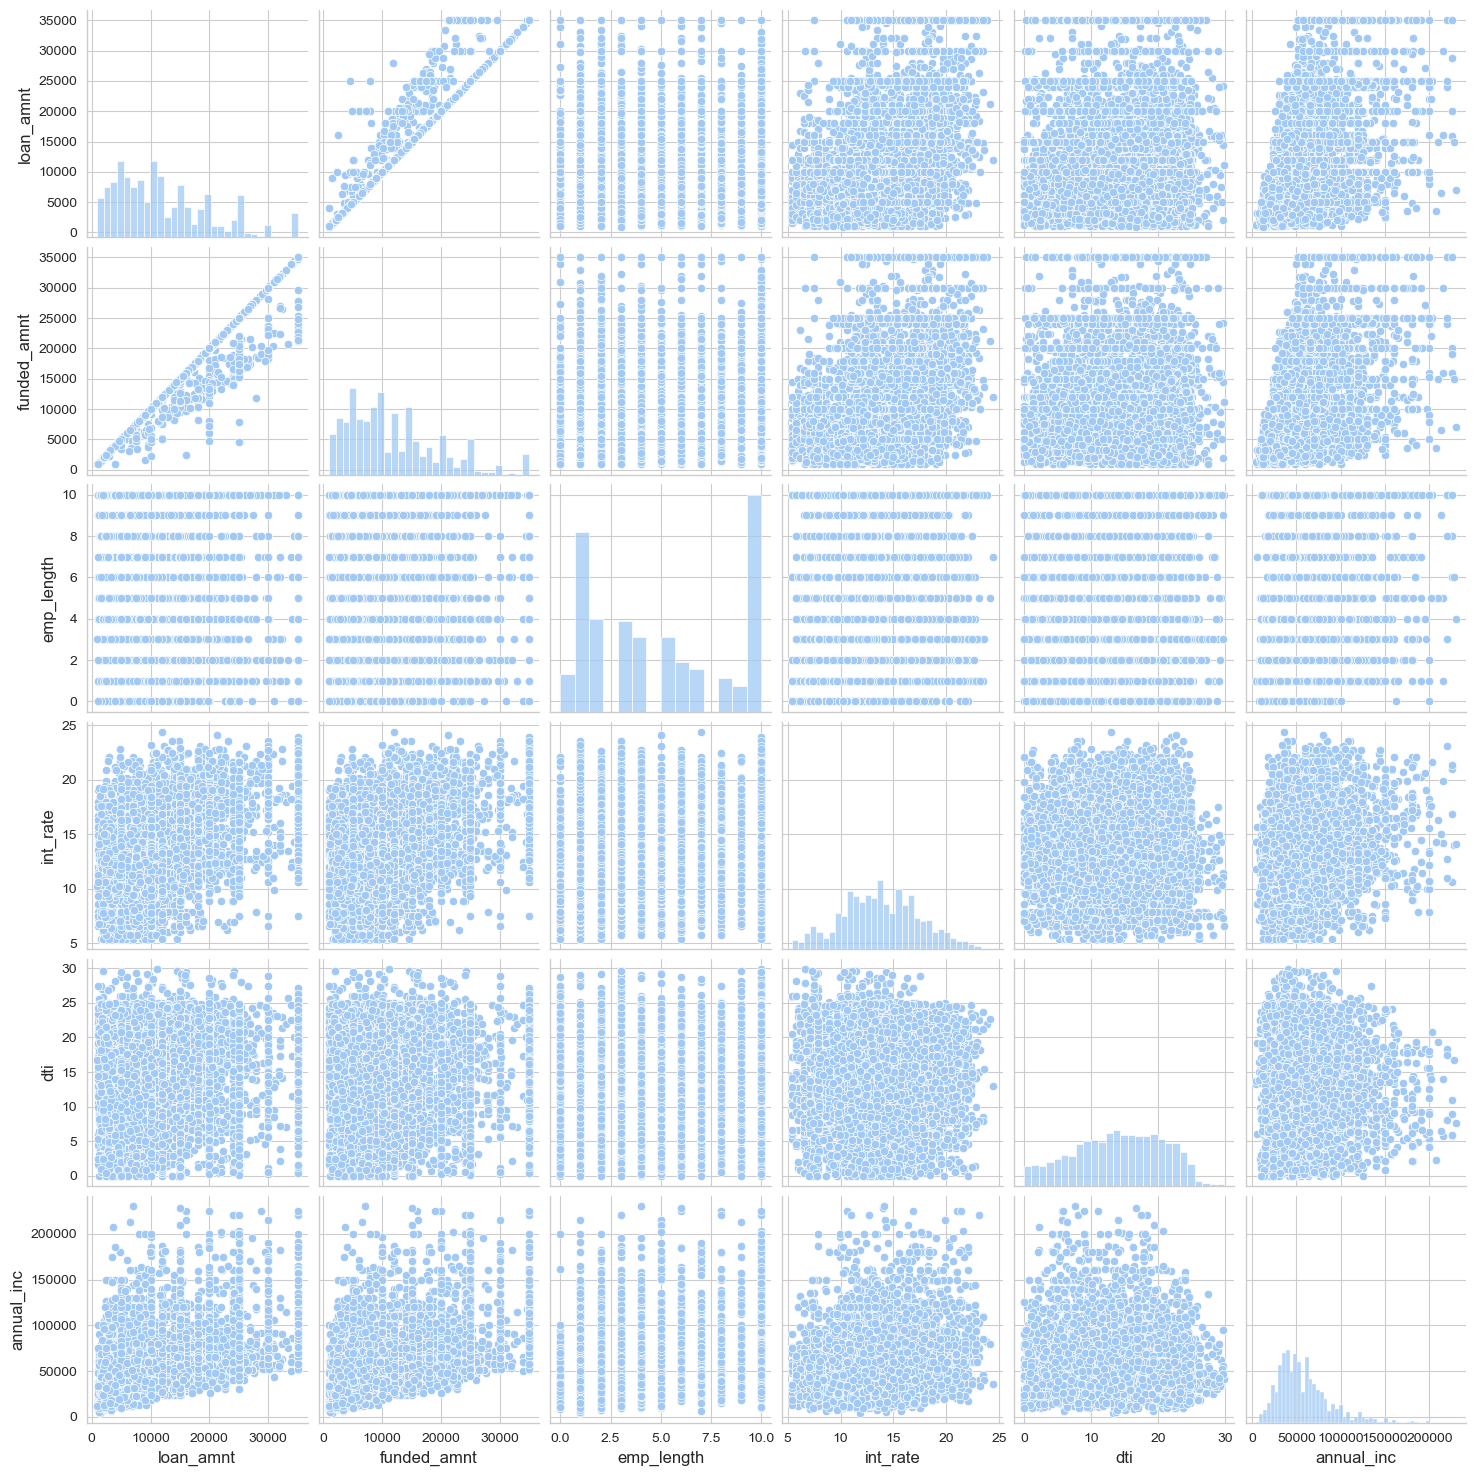

In [699]:
loan_chargedoff = loan[loan["loan_status"]=="Charged Off"]
sns.pairplot(loan_chargedoff[['loan_amnt', 'funded_amnt', 'emp_length','int_rate','dti','annual_inc']])
plt.show()

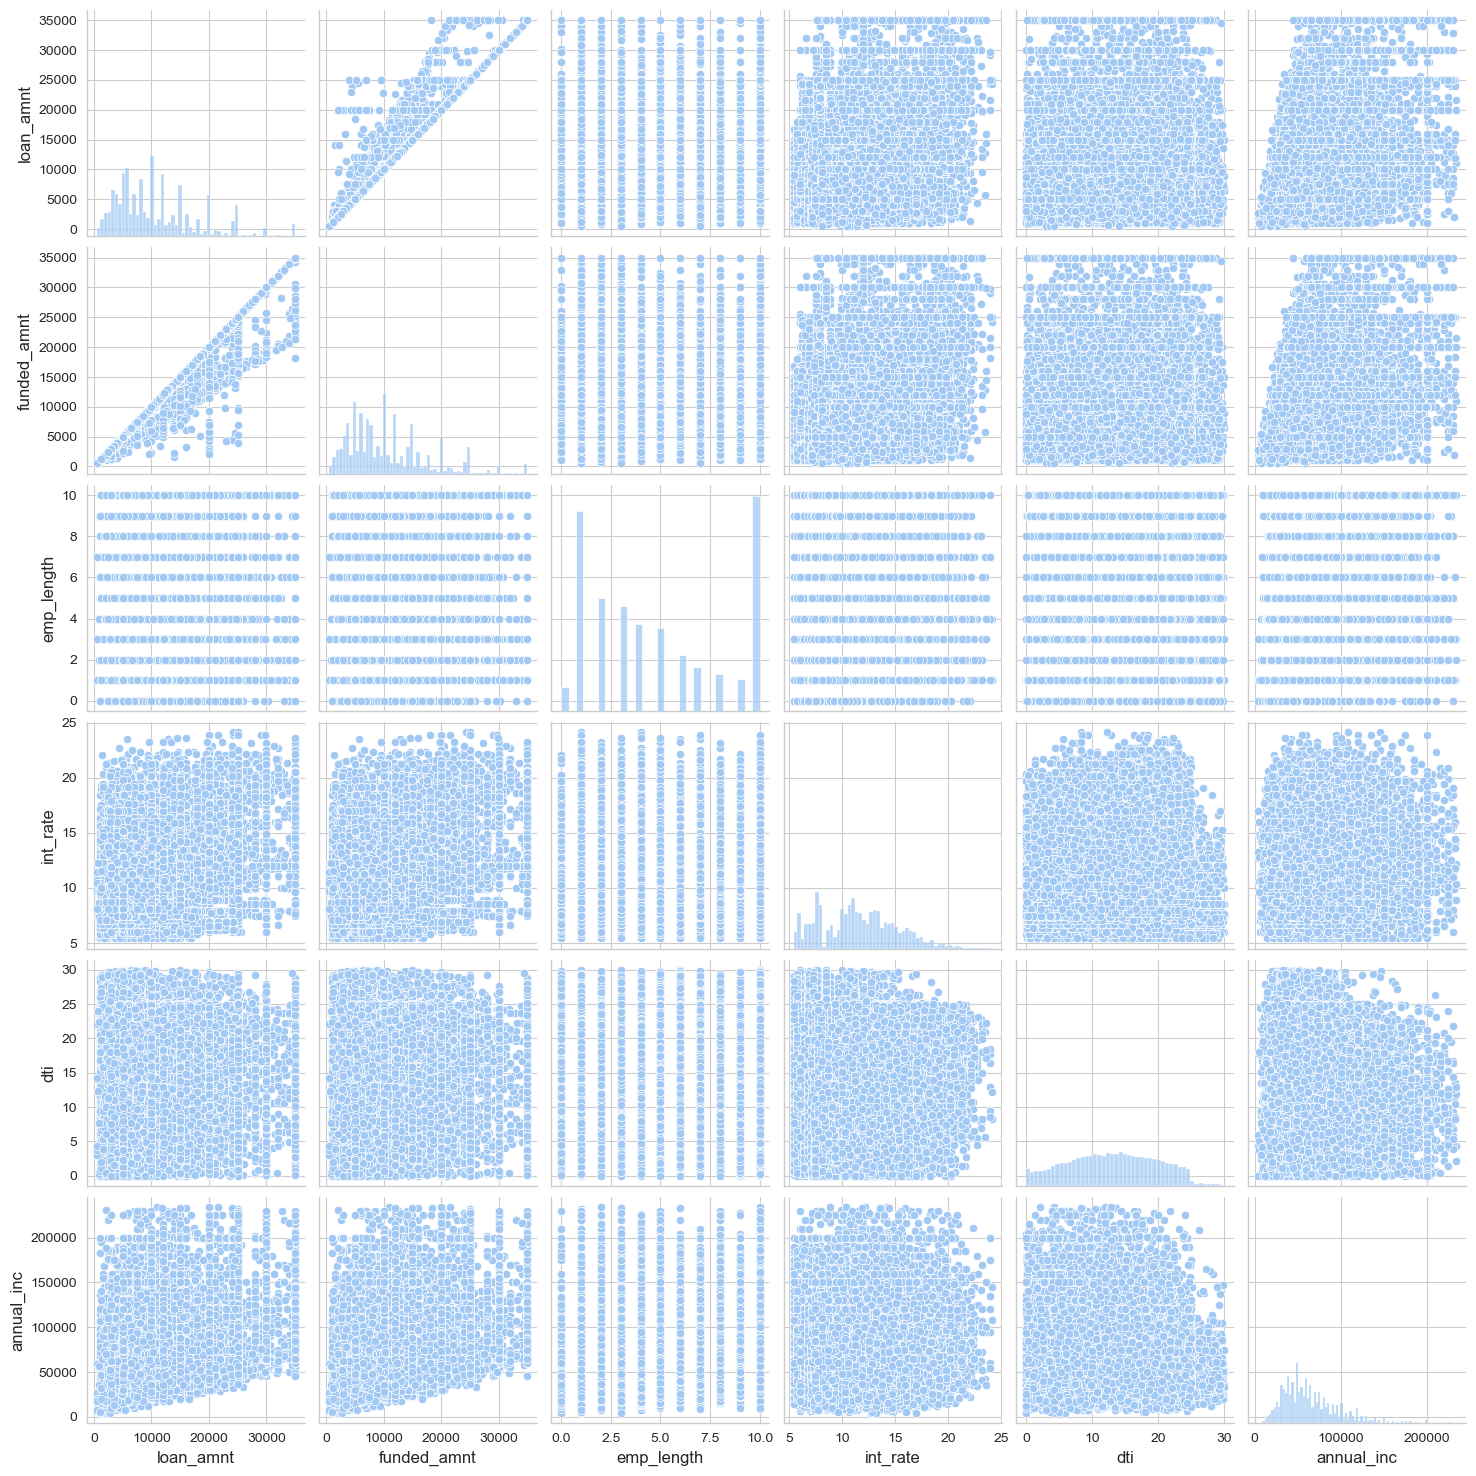

In [700]:
loan_fullypaid = loan[loan["loan_status"]=="Fully Paid"]
sns.pairplot(loan_fullypaid[['loan_amnt', 'funded_amnt', 'emp_length','int_rate','dti','annual_inc']])
plt.show()

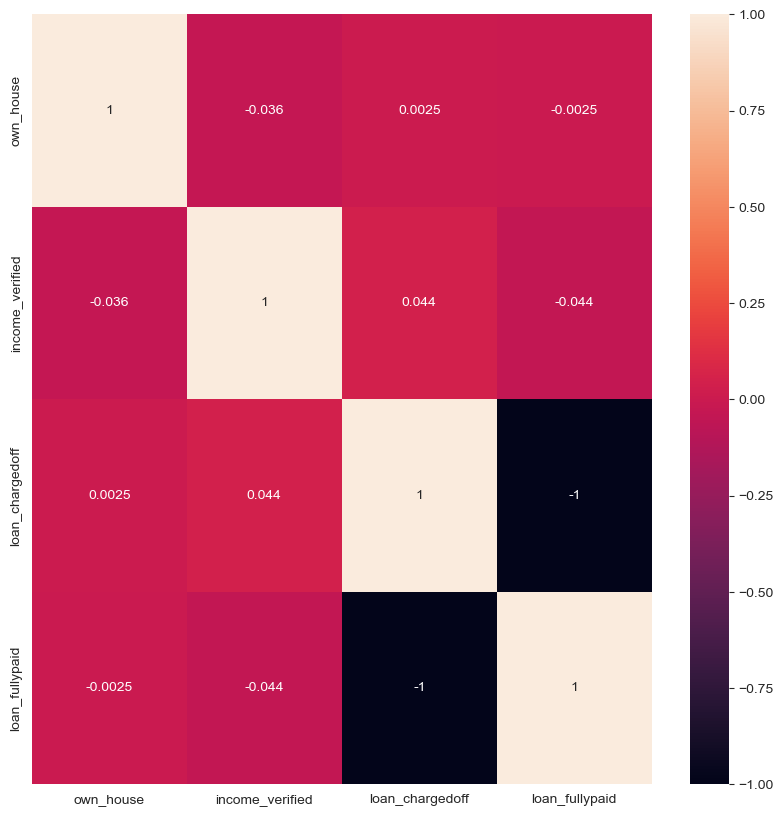

In [702]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan[['own_house','income_verified','loan_chargedoff','loan_fullypaid']].corr(),annot=True)
plt.show()

### Recommendations

Factors which can be used to predict the chance of Charged off and avoiding the Loss:

- Annual income
- Verification Status
- Purpose
- DTI
- Grades
- Term
- Home Ownership

# Insights

* Less Loam amount is like to get Fully Paid
* Lesser the Interest Rate the chances of getting lesser Charge offs
* Launching Loans with lesser Term/tenure with attarctively lesser interest will be a good product that will less likely end in charge off
* Borrowers with lesser annual income likely to end up with high interest rate which could increase the chance of charge off
* higher loan amounts tend to have higer interest rates which might end up in charge off